# Executive Summary

This is the coding part for the project - Analyzing Climate Hazard Risk to a Loan Portfolio.
The final results and outputs have already included in the final report with specific explanation. However, there are several parts such as module#4 Exploring Total loan data and module#6.2-6.6 that was just an exploration and no any concluded results did not contain in the report. 

# Loan data (Year 1991-2009)

## loan data (Year1991-1999)

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data into table

In [2]:
credit1991= pd.read_excel('foia-7afy1991-fy1999-asof-210630.xlsx',header=0)
credit1991.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,NV,NEVADA DISTRICT OFFICE,1.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,FL,NORTH FLORIDA DISTRICT OFFICE,7.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,SD,SOUTH DAKOTA DISTRICT OFFICE,0.0,INDIVIDUAL,PIF,2005-07-31,NaT,0,0,0
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,NH,NEW HAMPSHIRE DISTRICT OFFICE,1.0,INDIVIDUAL,CANCLD,NaT,NaT,0,0,0
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,TN,TENNESSEE DISTRICT OFFICE,7.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0


### Data Cleaning

In [3]:
#check missing data and their size of whole data
total = credit1991.isnull().sum().sort_values(ascending=False)
percent = (credit1991.isnull().sum()/credit1991.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
InitialInterestRate,337043,1.000000
FranchiseName,315476,0.936011
FranchiseCode,315457,0.935955
ChargeOffDate,301691,0.895111
NaicsDescription,184093,0.546200
NaicsCode,183872,0.545545
PaidInFullDate,81580,0.242046
FirstDisbursementDate,43381,0.128711
BankState,2031,0.006026
BankZip,2004,0.005946


In [4]:
#drop the missing data(rows) in the projectcounty and borrower state columns
dropped_credit1991=credit1991.dropna(subset=['ProjectCounty', 'BorrState'])
dropped_credit1991.isnull().sum().sort_values(ascending=False)

InitialInterestRate      336571
FranchiseName            315027
FranchiseCode            315022
ChargeOffDate            301279
NaicsDescription         183822
NaicsCode                183601
PaidInFullDate            81459
FirstDisbursementDate     43311
BankState                  2015
BankZip                    1988
BankCity                   1976
BankStreet                 1976
CongressionalDistrict      1088
BorrStreet                   88
BorrName                      8
BusinessType                  6
DeliveryMethod                5
ProjectCounty                 0
AsOfDate                      0
ProjectState                  0
SBADistrictOffice             0
GrossChargeOffAmount          0
RevolverStatus                0
LoanStatus                    0
subpgmdesc                    0
TermInMonths                  0
Program                       0
ApprovalFiscalYear            0
ApprovalDate                  0
SBAGuaranteedApproval         0
GrossApproval                 0
BankName

## Loan data (Year2000-2009)

In [5]:
credit2000= pd.read_excel('foia-7afy2000-fy2009-asof-210630.xlsx',header=0)
credit2000.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20210630,7A,STANLEYS BAR & LIQUORS INC,260 EAST RT 46,DOVER,NJ,7801,Popular Bank,11 W 51st St,NEW YORK CITY,...,NJ,NEW JERSEY DISTRICT OFFICE,11.0,CORPORATION,PIF,2005-05-31,NaT,0,0,7
1,20210630,7A,WALLPAPER FOR LESS,2316 PLANET AVENUE,SALINA,KS,0,"Sunflower Bank, National Association","1400 16th St, Ste 250",DENVER,...,KS,WICHITA DISTRICT OFFICE,1.0,CORPORATION,CHGOFF,NaT,2002-12-05,11929,0,0
2,20210630,7A,BOBCAT BREAKING AND SAWING,10924 GRANT #127,HOUSTON,TX,77070,Comerica Bank,1717 Main St,DALLAS,...,TX,HOUSTON DISTRICT OFFICE,2.0,INDIVIDUAL,PIF,2005-05-31,NaT,0,0,0
3,20210630,7A,YADANA ENTERPRISE INC,9400 COVENTRY SQUARE DR #202,HOUSTON,TX,77099,BBVA USA,15 S 20th St,BIRMINGHAM,...,TX,HOUSTON DISTRICT OFFICE,22.0,CORPORATION,CHGOFF,NaT,2003-01-13,298228,0,2
4,20210630,7A,QUIZNO'S CLASSIC SUBS #871,710 HWY 82 E,SHERMAN,TX,75090,Washington Mutual Bank,"2273 N Green Valley Pkwy, Ste",HENDERSON,...,TX,DALLAS / FT WORTH DISTRICT OFFICE,4.0,CORPORATION,PIF,2005-05-31,NaT,0,0,11


### Data Cleaning

In [6]:
#check missing data and their size of whole data
total = credit2000.isnull().sum().sort_values(ascending=False)
percent = (credit2000.isnull().sum()/credit2000.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
InitialInterestRate,653713,0.946934
FranchiseName,650703,0.942574
FranchiseCode,650691,0.942556
ChargeOffDate,542267,0.785499
PaidInFullDate,241887,0.350385
FirstDisbursementDate,82745,0.119860
NaicsDescription,19796,0.028675
NaicsCode,19699,0.028535
CongressionalDistrict,2453,0.003553
ProjectCounty,186,0.000269


In [7]:
#drop the missing data(rows) in the projectcounty and borrower state columns
dropped_credit2000=credit2000.dropna(subset=['ProjectCounty', 'BorrState'])
dropped_credit2000.isnull().sum().sort_values(ascending=False)

InitialInterestRate      653527
FranchiseName            650531
FranchiseCode            650530
ChargeOffDate            542105
PaidInFullDate           241836
FirstDisbursementDate     82709
NaicsDescription          19770
NaicsCode                 19673
CongressionalDistrict      2440
BankState                    38
BusinessType                 33
BankZip                      31
BankCity                     31
BankStreet                   31
BorrStreet                   16
BorrName                      5
LoanStatus                    0
SBADistrictOffice             0
GrossChargeOffAmount          0
ProjectState                  0
ProjectCounty                 0
RevolverStatus                0
AsOfDate                      0
subpgmdesc                    0
TermInMonths                  0
Program                       0
DeliveryMethod                0
ApprovalFiscalYear            0
ApprovalDate                  0
SBAGuaranteedApproval         0
GrossApproval                 0
BankName

## loan data (Year2010-2021)

In [8]:
credit2010= pd.read_excel('foia-7afy2010-present-asof-210630.xlsx',header=0)
credit2010.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20210630,7A,"CRESA PARTNERS - DENVER, INC.",7979 E TUFTS AVE PKWY STE 810,DENVER,CO,80237,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,...,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,PIF,2016-10-31,NaT,0,1,35
1,20210630,7A,The Hilltop Tavern,4757 Folsom Blvd,Sacramento,CA,95819,Plumas Bank,336 W Main St,QUINCY,...,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,PIF,2019-03-31,NaT,0,0,6
2,20210630,7A,River City Car Wash LLC,649 Harbor Blvd,West Sacramento,CA,95691,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,CA,SACRAMENTO DISTRICT OFFICE,3.0,CORPORATION,CHGOFF,NaT,2015-08-24,320098,0,27
3,20210630,7A,Alphagraphics,71 Newtown Road.,Danbury,CT,6810,Union Savings Bank,226 Main St,DANBURY,...,CT,CONNECTICUT DISTRICT OFFICE,5.0,CORPORATION,EXEMPT,NaT,NaT,0,1,5
4,20210630,7A,ON SITE AUTOMOTIVE APPEARANCE,603 WOODBRIDGE COURT,MIDDLEBURY,IN,46540,"VelocitySBA, LLC",9385 Haven Ave.,Rancho Cucamonga,...,IN,INDIANA DISTRICT OFFICE,3.0,INDIVIDUAL,PIF,2013-02-28,NaT,0,0,2


### Data Cleaning

In [9]:
#check missing data and their size of whole data
total = credit2010.isnull().sum().sort_values(ascending=False)
percent = (credit2010.isnull().sum()/credit2010.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ChargeOffDate,596942,0.963889
FranchiseName,561391,0.906484
FranchiseCode,561251,0.906258
PaidInFullDate,366598,0.591950
FirstDisbursementDate,84831,0.136978
NaicsDescription,921,0.001487
CongressionalDistrict,39,0.000063
BorrName,37,0.000060
NaicsCode,15,0.000024
BankState,9,0.000015


In [10]:
#drop the missing data(rows) in the projectcounty and borrower state columns
dropped_credit2010=credit2010.dropna(subset=['ProjectCounty', 'BorrState'])
dropped_credit2010.isnull().sum().sort_values(ascending=False)

ChargeOffDate            596940
FranchiseName            561389
FranchiseCode            561249
PaidInFullDate           366596
FirstDisbursementDate     84831
NaicsDescription            921
CongressionalDistrict        39
BorrName                     37
NaicsCode                    15
BankState                     9
BankZip                       9
BankCity                      9
BankStreet                    9
BusinessType                  5
DeliveryMethod                4
InitialInterestRate           1
SBADistrictOffice             0
ProjectState                  0
LoanStatus                    0
ProjectCounty                 0
GrossChargeOffAmount          0
RevolverStatus                0
AsOfDate                      0
subpgmdesc                    0
TermInMonths                  0
Program                       0
ApprovalFiscalYear            0
ApprovalDate                  0
SBAGuaranteedApproval         0
GrossApproval                 0
BankName                      0
BorrZip 

## Number of Loan Data in Total

In [11]:
#The total rows in the final loan data 
len(dropped_credit1991)+len(dropped_credit2000)+len(dropped_credit2010)

1646036

## Total Loan Data

In [12]:
#Stack up 3 datasets together and Clear the existing index and reset it in the result by setting the ignore_index option to True.
credit1991_present=pd.concat([dropped_credit1991, dropped_credit2000,dropped_credit2010], ignore_index=True)
credit1991_present.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,NV,NEVADA DISTRICT OFFICE,1.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,FL,NORTH FLORIDA DISTRICT OFFICE,7.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,SD,SOUTH DAKOTA DISTRICT OFFICE,0.0,INDIVIDUAL,PIF,2005-07-31,NaT,0,0,0
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,NH,NEW HAMPSHIRE DISTRICT OFFICE,1.0,INDIVIDUAL,CANCLD,NaT,NaT,0,0,0
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,TN,TENNESSEE DISTRICT OFFICE,7.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0


### Cleaning the total loan data

In [13]:
credit1991_2019 = credit1991_present.query('ApprovalFiscalYear <=2019')

In [14]:
len(credit1991_2019)

1572481

In [15]:
credit1991_2019.dtypes

AsOfDate                          int64
Program                          object
BorrName                         object
BorrStreet                       object
BorrCity                         object
BorrState                        object
BorrZip                           int64
BankName                         object
BankStreet                       object
BankCity                         object
BankState                        object
BankZip                          object
GrossApproval                     int64
SBAGuaranteedApproval             int64
ApprovalDate             datetime64[ns]
ApprovalFiscalYear                int64
FirstDisbursementDate    datetime64[ns]
DeliveryMethod                   object
subpgmdesc                       object
InitialInterestRate             float64
TermInMonths                      int64
NaicsCode                       float64
NaicsDescription                 object
FranchiseCode                    object
FranchiseName                    object


### Fill the missing initial interest rate (1991-2009)

* We fill the missing "intital interest rate" by using the prime interest rate, which is one of the 3 acceptable base rates for initial interest rate in 7(a) loan. 
Resource: https://fred.stlouisfed.org/series/DPRIME
* Since the prime rate range we use is different for each year, we have to add the interest rates year by year. 

In [19]:
# Prime interest rate changes from 1991 to 2019
prime= pd.read_excel('PRIME.xls',header=0)
prime

,observation_date,PRIME
0,1991-01-02,9.50
1,1991-02-04,9.00
2,1991-05-01,8.50
3,1991-09-13,8.00
4,1991-11-06,7.50
...,...,...
73,2018-09-27,5.25
74,2018-12-20,5.50
75,2019-08-01,5.25
76,2019-09-19,5.00


In [16]:
credit1991_2019=credit1991_2019.copy()

* Add interest rate for year 1991

In [17]:
import random
np.random.seed(55)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1991].index

# now use ".loc" to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(6.5, 9.5,size=18412)

In [18]:
#Check if there exists any NA value after filling step
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1991].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1992

In [19]:
# Check the number of missing records in 1992
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1992].InitialInterestRate.isnull().sum()

23613

In [20]:
import random
np.random.seed(56)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1992].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(6, 6.25,size=23613)

In [21]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1992].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1993

In [22]:
#check the missing number of initialinterestrate in 1993
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1993].InitialInterestRate.isnull().sum()

26248

In [23]:
import random
np.random.seed(57)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1993].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(6, 6.25,size=26248)

In [24]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1993].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1994

In [25]:
#check the missing number of initialinterestrate in 1994
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1994].InitialInterestRate.isnull().sum()

35981

In [26]:
import random
np.random.seed(58)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1994].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(6.25, 8.5,size=35981)

In [27]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1994].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1995

In [28]:
#check the missing number of initialinterestrate in 1995
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1995].InitialInterestRate.isnull().sum()

55470

In [29]:
import random
np.random.seed(59)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1995].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(8.5, 9,size=55470)

In [30]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1995].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1996

In [31]:
#check the missing number of initialinterestrate in 1996
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1996].InitialInterestRate.isnull().sum()

45787

In [32]:
import random
np.random.seed(59)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1996].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(8.25, 8.5,size=45787)

In [33]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1996].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1997

In [34]:
#check the missing number of initialinterestrate in 1997
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1997].InitialInterestRate.isnull().sum()

45234

In [35]:
import random
np.random.seed(60)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1997].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(8.25, 8.5,size=45234)

In [36]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1997].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1998

In [37]:
#check the missing number of initialinterestrate in 1998
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1998].InitialInterestRate.isnull().sum()

42231

In [38]:
import random
np.random.seed(61)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1998].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(7.75, 8.5,size=42231)

In [39]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1998].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 1999

In [40]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1999].InitialInterestRate.isnull().sum()

43595

In [41]:
import random
np.random.seed(62)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==1999].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(8, 8.5,size=43595)

In [42]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==1999].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2000

In [43]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2000].InitialInterestRate.isnull().sum()

43714

In [44]:
import random
np.random.seed(63)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2000].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(8.75, 9.5,size=43714)

In [45]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2000].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2001

In [46]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2001].InitialInterestRate.isnull().sum()

42939

In [47]:
import random
np.random.seed(64)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2001].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(4.75, 9,size=42939)

In [48]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2001].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2002

In [49]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2002].InitialInterestRate.isnull().sum()

51635

In [50]:
import random
np.random.seed(65)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2002].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(4, 4.25,size=51635)

In [51]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2002].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2003

In [52]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2003].InitialInterestRate.isnull().sum()

67277

In [53]:
import random
np.random.seed(66)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2003].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(4, 4.25,size=67277)

In [54]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2003].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2004

In [55]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2004].InitialInterestRate.isnull().sum()

81110

In [56]:
import random
np.random.seed(69)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2004].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(4.25, 5.25,size=81110)

In [57]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2004].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2005

In [58]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2005].InitialInterestRate.isnull().sum()

95880

In [59]:
import random
np.random.seed(70)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2005].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(5.5, 7.25,size=95880)

In [60]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2005].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2006

In [61]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2006].InitialInterestRate.isnull().sum()

97277

In [62]:
import random
np.random.seed(71)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2006].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(7.5, 8.25,size=97277)

In [63]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2006].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2007

In [64]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2007].InitialInterestRate.isnull().sum()

99604

In [65]:
import random
np.random.seed(72)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2007].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(7.25, 7.75,size=99604)

In [66]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2007].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2008

In [67]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2008].InitialInterestRate.isnull().sum()

69436

In [68]:
import random
np.random.seed(74)
# get the indices for the rows you want to change
newindex=credit1991_2019[credit1991_2019['ApprovalFiscalYear']==2008].index

# now use df.loc to set values only to those rows
credit1991_2019.loc[newindex,'InitialInterestRate'] = np.random.uniform(3.25, 6.5,size=69436)

In [69]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2008].InitialInterestRate.isnull().sum()

0

* Add interest rate for year 2009

In [70]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2009].InitialInterestRate.isnull().sum()

4655

In [71]:
import random
np.random.seed(76)
idx = credit1991_2019[(credit1991_2019['ApprovalFiscalYear']==2009) & (credit1991_2019['InitialInterestRate'].isnull())].index
credit1991_2019.loc[idx,'InitialInterestRate']=np.random.uniform(3.25,3.5,size=4655)

In [72]:
credit1991_2019[credit1991_2019.ApprovalFiscalYear ==2009].InitialInterestRate.isnull().sum()

0

In [73]:
# check if there are still any missing values for initial interest rate
credit1991_2019.isnull().sum().sort_values(ascending=False)

FranchiseName            1463797
FranchiseCode            1463690
ChargeOffDate            1366777
PaidInFullDate            617770
NaicsDescription          204180
NaicsCode                 203285
FirstDisbursementDate     193204
CongressionalDistrict       3562
BankState                   2055
BankZip                     2021
BankCity                    2009
BankStreet                  2009
BorrStreet                   104
BorrName                      48
BusinessType                  44
DeliveryMethod                 5
LoanStatus                     0
GrossChargeOffAmount           0
SBADistrictOffice              0
RevolverStatus                 0
ProjectState                   0
ProjectCounty                  0
AsOfDate                       0
subpgmdesc                     0
TermInMonths                   0
InitialInterestRate            0
Program                        0
ApprovalFiscalYear             0
ApprovalDate                   0
SBAGuaranteedApproval          0
GrossAppro

# Add the External Matching Tool (countyFIPS) into loan dataset

Download the external matching tool --  countyfipstool20190120codebook from https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/OSLU4G/TJAKCV&version=1.0

## Import the tool -- countyFIPS

In [74]:
#Use an external matching database and fill the fips to make them consistent, because the state-county level FIPS code should be 5-digits.
match_df= pd.read_csv('countyfipstool20190120.csv',header=0)
match_df.head()

,sname,sab,sid,sfips,cname,saint,cfips,fips
0,Alabama,AL,1.0,1,AUTAUGA COUNTY,0,1,1001
1,Alabama,AL,1.0,1,AUTAUGA CTY.,0,1,1001
2,Alabama,AL,1.0,1,autauga cty.,0,1,1001
3,Alabama,AL,1.0,1,AUTAUGA CNTY.,0,1,1001
4,Alabama,AL,1.0,1,AUTAUGA CY,0,1,1001


In [75]:
#check the data types of each column
match_df.dtypes

sname     object
sab       object
sid      float64
sfips      int64
cname     object
saint      int64
cfips      int64
fips       int64
dtype: object

In [76]:
#make sure the state-county level FIPS code is 5-digits.
match_df['fips']=match_df['fips'].astype(str).str.zfill(5)
match_df.head()

,sname,sab,sid,sfips,cname,saint,cfips,fips
0,Alabama,AL,1.0,1,AUTAUGA COUNTY,0,1,01001
1,Alabama,AL,1.0,1,AUTAUGA CTY.,0,1,01001
2,Alabama,AL,1.0,1,autauga cty.,0,1,01001
3,Alabama,AL,1.0,1,AUTAUGA CNTY.,0,1,01001
4,Alabama,AL,1.0,1,AUTAUGA CY,0,1,01001


## Trim the loan data for merge

In [77]:
credit1991_2019=credit1991_2019.copy()

In [78]:
#Trim the loan data and rename the var to be consistent with the mathching tool
credit1991_2019['ProjectCounty']=credit1991_2019['ProjectCounty'].str.strip()
credit1991_2019['BorrState']=credit1991_2019['BorrState'].str.strip()

In [79]:
#Use sab and cname as key to match with the loan data, so make their spelling consistant 
credit1991_2019.rename(columns={'ProjectCounty':'cname'}, inplace=True)
credit1991_2019.rename(columns={'BorrState':'sab'}, inplace=True)

## Merge the countyFIPS with Total loan data

In [80]:
merged_credit1991_2019=pd.merge(credit1991_2019,match_df[['sab','cname','fips']],how='left',on=['sab','cname'])
merged_credit1991_2019.columns.tolist()

['AsOfDate',
 'Program',
 'BorrName',
 'BorrStreet',
 'BorrCity',
 'sab',
 'BorrZip',
 'BankName',
 'BankStreet',
 'BankCity',
 'BankState',
 'BankZip',
 'GrossApproval',
 'SBAGuaranteedApproval',
 'ApprovalDate',
 'ApprovalFiscalYear',
 'FirstDisbursementDate',
 'DeliveryMethod',
 'subpgmdesc',
 'InitialInterestRate',
 'TermInMonths',
 'NaicsCode',
 'NaicsDescription',
 'FranchiseCode',
 'FranchiseName',
 'cname',
 'ProjectState',
 'SBADistrictOffice',
 'CongressionalDistrict',
 'BusinessType',
 'LoanStatus',
 'PaidInFullDate',
 'ChargeOffDate',
 'GrossChargeOffAmount',
 'RevolverStatus',
 'JobsSupported',
 'fips']

In [81]:
len(merged_credit1991_2019)

1572481

In [82]:
#check the total number and percent of missing data 
total = merged_credit1991_2019.isnull().sum().sort_values(ascending=False)
percent = (merged_credit1991_2019.isnull().sum()/merged_credit1991_2019.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FranchiseName,1463797,0.930884
FranchiseCode,1463690,0.930816
ChargeOffDate,1366777,0.869185
PaidInFullDate,617770,0.392863
NaicsDescription,204180,0.129846
NaicsCode,203285,0.129277
FirstDisbursementDate,193204,0.122866
fips,41602,0.026456
CongressionalDistrict,3562,0.002265
BankState,2055,0.001307


In [83]:
merged_credit1991_2019[merged_credit1991_2019.duplicated(['fips'], keep=False)]
#These fips all have duplicates

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,fips
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,NEVADA DISTRICT OFFICE,1.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0,32003
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,NORTH FLORIDA DISTRICT OFFICE,7.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0,12095
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,SOUTH DAKOTA DISTRICT OFFICE,0.0,INDIVIDUAL,PIF,2005-07-31,NaT,0,0,0,46135
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,NEW HAMPSHIRE DISTRICT OFFICE,1.0,INDIVIDUAL,CANCLD,NaT,NaT,0,0,0,33011
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,TENNESSEE DISTRICT OFFICE,7.0,CORPORATION,PIF,2005-07-31,NaT,0,0,0,47125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572476,20210630,7A,Trinity Hospitality Management,1935 Emporium Drive,Jackson,TN,38305,"Home Loan Investment Bank, F.S.B.",1 Home Loan Plaza,WARWICK,...,TENNESSEE DISTRICT OFFICE,8.0,CORPORATION,EXEMPT,NaT,NaT,0,0,19,47113
1572477,20210630,7A,KKC Dirtworks LLC,116 Raccoon Ravine Court,Johnstown,OH,43031,The Huntington National Bank,17 S High St,COLUMBUS,...,COLUMBUS DISTRICT OFFICE,12.0,CORPORATION,COMMIT,NaT,NaT,0,1,3,39089
1572478,20210630,7A,AML Transport LLC,7641 Division Ave S,Grand Rapids,MI,49548,The Huntington National Bank,17 S High St,COLUMBUS,...,MICHIGAN DISTRICT OFFICE,3.0,CORPORATION,PIF,2021-04-30,NaT,0,0,2,26081
1572479,20210630,7A,"Super Swim Schools, LLC",7000 E. Mayo Blvd.,Phoenix,AZ,85054,KeyBank National Association,127 Public Sq,CLEVELAND,...,ARIZONA DISTRICT OFFICE,6.0,CORPORATION,EXEMPT,NaT,NaT,0,0,60,04013


# Exploring Total loan data

In [87]:
# Group the loan data by fips code 
merged_loan_byfips=merged_credit1991_2019.groupby(['sab','cname','fips']).mean().reset_index()
merged_loan_byfips

,sab,cname,fips,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,AK,ALEUTIANS EAST,02013,20210630.0,99669.000000,40000.000000,20000.000000,2011.000000,6.000000,84.000000,443111.000000,0.000000,0.000000,1.000000,14.000000
1,AK,ALEUTIANS WEST,02016,20210630.0,99626.333333,807777.777778,718333.333333,2007.555556,6.954192,73.555556,432373.625000,0.000000,185274.888889,0.444444,43.111111
2,AK,ANCHORAGE,02020,20210630.0,99512.081710,359961.507228,274278.235701,2003.871150,7.041206,107.698303,520130.535627,0.013828,10102.568196,0.137021,7.774984
3,AK,Aleutian Islands,02010,20210630.0,99637.000000,293857.142857,244294.285714,1993.571429,7.289232,120.285714,174660.500000,0.000000,0.000000,0.000000,0.000000
4,AK,BETHEL,02050,20210630.0,99575.210526,591894.736842,521781.578947,2006.052632,7.112422,98.894737,430945.866667,0.000000,25500.000000,0.263158,16.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,WY,SWEETWATER,56037,20210630.0,82494.469274,377313.586592,285235.402235,2003.888268,7.021441,121.301676,511596.748344,0.011236,8928.430168,0.089385,4.189944
3112,WY,TETON,56039,20210630.0,83014.470270,196811.545946,153127.589189,2001.805405,7.533982,103.670270,507280.174312,0.043243,2517.048649,0.167568,2.464865
3113,WY,UINTA,56041,20210630.0,82928.875740,185152.893491,137183.455621,2003.704142,6.830255,111.704142,483771.196970,0.000000,3380.384615,0.094675,3.207101
3114,WY,WASHAKIE,56043,20210630.0,82406.951613,203329.225806,155091.725806,2001.564516,7.054070,126.387097,504074.707317,0.000000,5787.370968,0.032258,1.725806


In [88]:
# add the 'loan loss ratio' for one way of the measurement of credit risk
merged_loan_byfips['loanloss_ratio']=round(merged_loan_byfips['GrossChargeOffAmount']/merged_loan_byfips['GrossApproval'],6)
merged_loan_byfips.sort_values(by='loanloss_ratio', ascending=False)

,sab,cname,fips,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported,loanloss_ratio
1291,MI,ST JOSEPH,26149,20210630.0,49103.0000,20000.000000,10000.000000,2006.000000,7.643616,37.0000,445110.000000,2.00,13949.0,0.000,5.000000,0.697450
2717,TX,TERRELL,48443,20210630.0,78649.0000,39250.000000,29925.000000,2002.250000,7.323193,55.2500,576443.333333,18.75,26218.0,0.250,0.500000,0.667975
690,IL,ALEXANDER,17003,20210630.0,62914.0000,167283.333333,129682.500000,1997.333333,8.325676,154.5000,583610.000000,12.00,110876.0,0.000,1.500000,0.662804
2191,OR,GILLIAM,41021,20210630.0,97823.0000,150000.000000,127500.000000,2001.000000,5.203495,24.0000,721110.000000,2.00,92944.0,0.000,0.000000,0.619627
1490,MO,WORTH,29227,20210630.0,64486.0000,20000.000000,17000.000000,2010.000000,7.500000,57.0000,524210.000000,6.00,12059.0,0.000,2.000000,0.602950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,MT,TOOLE,30101,20210630.0,60594.9375,289942.125000,217352.187500,2003.031250,7.099809,101.8125,630386.500000,0.00,0.0,0.125,1.593750,0.000000
1627,MT,WIBAUX,30109,20210630.0,59353.0000,52062.500000,43400.000000,2003.000000,8.183429,87.7500,331344.750000,0.00,0.0,0.000,2.000000,0.000000
2613,TX,IRION,48235,20210630.0,76938.2500,67999.500000,58050.750000,2011.000000,6.601902,95.0000,319445.000000,11.00,0.0,0.000,1.500000,0.000000
2601,TX,HEMPHILL,48211,20210630.0,79014.0000,136777.777778,104563.888889,2000.000000,7.455452,117.0000,464294.111111,13.00,0.0,0.000,0.666667,0.000000


In [89]:
#delete some unuseful column
#an optional parameter inplace=True so that the original data can be modified without creating a copy.
columns = ['AsOfDate','BorrZip', 'CongressionalDistrict', 'SBAGuaranteedApproval','ApprovalFiscalYear',
           'TermInMonths','NaicsCode', 'CongressionalDistrict','RevolverStatus','JobsSupported' ]
merged_loan_byfips.drop(columns, inplace=True, axis=1)

In [90]:
merged_loan_byfips.sort_values(by='InitialInterestRate', ascending=False)

,sab,cname,fips,GrossApproval,InitialInterestRate,GrossChargeOffAmount,loanloss_ratio
1475,MO,SCHUYLER,29197,7.354000e+04,8.687960,16097.2,0.218890
2342,SD,BUFFALO,46017,5.333333e+04,8.667793,0.0,0.000000
1519,MS,ISSAQUENA,28055,1.000000e+05,8.654109,0.0,0.000000
1784,NE,ARTHUR,31005,2.500000e+04,8.650213,0.0,0.000000
1050,KY,LEE,21129,3.100000e+04,8.549839,0.0,0.000000
...,...,...,...,...,...,...,...
1943,NV,ESMERALDA,32009,8.400000e+04,5.127734,42474.0,0.505643
2634,TX,LA SALLE,48283,4.452400e+05,5.060060,0.0,0.000000
2442,TN,HOUSTON,47083,1.211062e+06,4.938556,0.0,0.000000
2215,OR,WHEELER,41069,5.650000e+04,4.688620,0.0,0.000000


## Only loan data groupby fips (3116 counties)

In [104]:
merged_loan_byfips

,sab,cname,fips,GrossApproval,InitialInterestRate,GrossChargeOffAmount,loanloss_ratio
0,AK,ALEUTIANS EAST,02013,40000.000000,6.000000,0.000000,0.000000
1,AK,ALEUTIANS WEST,02016,807777.777778,6.954192,185274.888889,0.229364
2,AK,ANCHORAGE,02020,359961.507228,7.041206,10102.568196,0.028066
3,AK,Aleutian Islands,02010,293857.142857,7.289232,0.000000,0.000000
4,AK,BETHEL,02050,591894.736842,7.112422,25500.000000,0.043082
...,...,...,...,...,...,...,...
3111,WY,SWEETWATER,56037,377313.586592,7.021441,8928.430168,0.023663
3112,WY,TETON,56039,196811.545946,7.533982,2517.048649,0.012789
3113,WY,UINTA,56041,185152.893491,6.830255,3380.384615,0.018257
3114,WY,WASHAKIE,56043,203329.225806,7.054070,5787.370968,0.028463


## Add industry sector

In [91]:
#add new column Industry_sector, just extract the first two digits in the NaicsCode. The two digits stand for the ecomonic/industry. sector
merged_credit1991_2019['Industry_sector'] = merged_credit1991_2019['NaicsCode'].astype(str).str[0:2]

In [92]:
# Create the dictionary code of industry
industry_dictionary ={'11' : 'Agriculture, Forestry, Fishing and Hunting', '21' : 'Mining','22':'Utilities',
                   '62':'Health Care and Social Assistance','23':'Construction',
                   '31':'Manufacturing', '32' :'Manufacturing','33':'Manufacturing','42':'Wholesale Trade','44':'Retail Trade', '45':'Retail Trade',
                   '48' :'Transportation and Warehousing', '49':'Transportation and Warehousing', '51':'Information',
                   '52':'Finance and Insurance',
                   '53':'Real Estate Rental and Leasing','54':'Professional, Scientific, and Technical Services',
                   '55':'Management of Companies and Enterprises',
                   '56':'Administrative and Support and Waste Management and Remediation Services',
                   '61':'Educational Services','62':'Health Care and Social Assistance',
                   '71':'Arts, Entertainment, and Recreation',
                   '72':'Accommodation and Food Services','81':'Other Services (except Public Administration)',
                   '92':'Public Administration'}

  
# Add a new column named 'Industry_title'
merged_credit1991_2019['Industry_title'] = merged_credit1991_2019['Industry_sector'].map(industry_dictionary)
  
merged_credit1991_2019

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,fips,Industry_sector,Industry_title
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,CORPORATION,PIF,2005-07-31,NaT,0,0,0,32003,na,NaN
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,CORPORATION,PIF,2005-07-31,NaT,0,0,0,12095,62,Health Care and Social Assistance
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,INDIVIDUAL,PIF,2005-07-31,NaT,0,0,0,46135,44,Retail Trade
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,INDIVIDUAL,CANCLD,NaT,NaT,0,0,0,33011,42,Wholesale Trade
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,CORPORATION,PIF,2005-07-31,NaT,0,0,0,47125,na,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572476,20210630,7A,Trinity Hospitality Management,1935 Emporium Drive,Jackson,TN,38305,"Home Loan Investment Bank, F.S.B.",1 Home Loan Plaza,WARWICK,...,CORPORATION,EXEMPT,NaT,NaT,0,0,19,47113,72,Accommodation and Food Services
1572477,20210630,7A,KKC Dirtworks LLC,116 Raccoon Ravine Court,Johnstown,OH,43031,The Huntington National Bank,17 S High St,COLUMBUS,...,CORPORATION,COMMIT,NaT,NaT,0,1,3,39089,23,Construction
1572478,20210630,7A,AML Transport LLC,7641 Division Ave S,Grand Rapids,MI,49548,The Huntington National Bank,17 S High St,COLUMBUS,...,CORPORATION,PIF,2021-04-30,NaT,0,0,2,26081,48,Transportation and Warehousing
1572479,20210630,7A,"Super Swim Schools, LLC",7000 E. Mayo Blvd.,Phoenix,AZ,85054,KeyBank National Association,127 Public Sq,CLEVELAND,...,CORPORATION,EXEMPT,NaT,NaT,0,0,60,04013,61,Educational Services


### Only loan data groupby industry(19 industries)

In [93]:
merged_loan_byindustry=merged_credit1991_2019.groupby(['Industry_title']).mean().reset_index()
merged_loan_byindustry['loanloss_ratio']=round(merged_loan_byindustry['GrossChargeOffAmount']/merged_loan_byindustry['GrossApproval'],6)
merged_loan_byindustry.sort_values(by='loanloss_ratio', ascending=False)

,Industry_title,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported,loanloss_ratio
4,Construction,20210630.0,52092.399011,166959.813737,116890.277058,2008.408715,6.717501,90.461992,237197.081483,9.467988,10975.056593,0.449607,7.860119,0.065735
16,Retail Trade,20210630.0,51375.739859,245401.269524,180954.775767,2006.715522,6.488721,111.332237,447497.265219,10.198550,15356.922610,0.249191,5.546219,0.062579
1,Administrative and Support and Waste Managemen...,20210630.0,49221.550226,153483.897457,109260.373999,2008.404180,6.483329,89.272526,561718.620653,9.899152,9031.540113,0.376689,10.814259,0.058844
8,Information,20210630.0,53451.546307,198196.003719,142898.588029,2007.244829,6.581662,89.266327,514022.060367,11.311323,11128.801223,0.349007,7.358482,0.056150
12,Other Services (except Public Administration),20210630.0,51404.570793,229919.045723,169798.541870,2007.047814,6.551227,120.327213,811789.656639,10.384217,12438.182440,0.226150,6.193840,0.054098
0,Accommodation and Food Services,20210630.0,52101.165272,381332.973146,283204.430447,2009.154869,6.249807,129.676623,722143.476103,10.035129,20378.013272,0.153643,15.144062,0.053439
14,Public Administration,20210630.0,44716.497283,142082.785326,105236.046196,2003.692935,7.377222,83.288043,924018.396739,8.844687,7471.948370,0.263587,4.288043,0.052589
17,Transportation and Warehousing,20210630.0,50914.891729,162679.267744,115117.806496,2010.307824,6.528299,84.649568,485596.122215,10.084186,8107.088775,0.304596,7.578925,0.049835
3,"Arts, Entertainment, and Recreation",20210630.0,49864.043499,319852.118415,235942.459566,2008.923129,6.540554,115.841017,713454.419324,9.568733,15898.341091,0.202274,9.541885,0.049705
10,Manufacturing,20210630.0,52717.980133,340198.853594,251823.456308,2006.891991,6.410805,104.704743,327652.959226,10.762521,16602.484320,0.266274,10.940262,0.048802


In [94]:
#delete some unuseful column
#an optional parameter inplace=True so that the original data can be modified without creating a copy.
columns2 = ['AsOfDate','BorrZip', 'CongressionalDistrict','ApprovalFiscalYear', 'SBAGuaranteedApproval',
           'TermInMonths','NaicsCode', 'CongressionalDistrict','RevolverStatus','JobsSupported' ]
merged_loan_byindustry.drop(columns2, inplace=True, axis=1)

In [95]:
merged_loan_byindustry.sort_values(by='loanloss_ratio', ascending=False)

,Industry_title,GrossApproval,InitialInterestRate,GrossChargeOffAmount,loanloss_ratio
4,Construction,166959.813737,6.717501,10975.056593,0.065735
16,Retail Trade,245401.269524,6.488721,15356.922610,0.062579
1,Administrative and Support and Waste Managemen...,153483.897457,6.483329,9031.540113,0.058844
8,Information,198196.003719,6.581662,11128.801223,0.056150
12,Other Services (except Public Administration),229919.045723,6.551227,12438.182440,0.054098
0,Accommodation and Food Services,381332.973146,6.249807,20378.013272,0.053439
14,Public Administration,142082.785326,7.377222,7471.948370,0.052589
17,Transportation and Warehousing,162679.267744,6.528299,8107.088775,0.049835
3,"Arts, Entertainment, and Recreation",319852.118415,6.540554,15898.341091,0.049705
10,Manufacturing,340198.853594,6.410805,16602.484320,0.048802


## Add US regions & divisions

In [96]:
#https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
usregions_divisions= pd.read_csv('usregions_divisions.csv',header=0)
usregions_divisions.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


### Merge region with the Total loan data

In [97]:
#rename the state code in usregions_divisions prepared for the integration with merged_credit1991_2019 data
usregions_divisions.rename(columns={'State Code':'sab'}, inplace=True)

In [98]:
usregions_divisions.drop('State', axis=1, inplace=True)

In [99]:
#add region and division
merged_credit1991_2019_byregion=pd.merge(merged_credit1991_2019,usregions_divisions,how='left',on=['sab'])
merged_credit1991_2019_byregion.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,fips,Industry_sector,Industry_title,Region,Division
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,2005-07-31,NaT,0,0,0,32003,na,NaN,West,Mountain
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,2005-07-31,NaT,0,0,0,12095,62,Health Care and Social Assistance,South,South Atlantic
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,2005-07-31,NaT,0,0,0,46135,44,Retail Trade,Midwest,West North Central
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,NaT,NaT,0,0,0,33011,42,Wholesale Trade,Northeast,New England
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,2005-07-31,NaT,0,0,0,47125,na,NaN,South,East South Central


### Only loan data groupby Region(4 Regions)

In [100]:
merged_loan_byregion=merged_credit1991_2019_byregion.groupby(['Region']).mean().reset_index()
merged_loan_byregion['loanloss_ratio']=round(merged_loan_byregion['GrossChargeOffAmount']/merged_loan_byregion['GrossApproval'],6)
merged_loan_byregion.sort_values(by='loanloss_ratio', ascending=False)

,Region,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported,loanloss_ratio
2,South,20210630.0,48133.911959,300367.278575,223120.476572,2006.204624,6.763733,114.455943,526832.468884,10.189322,16892.909037,0.203253,7.382982,0.056241
0,Midwest,20210630.0,54004.983636,228082.387984,167130.439785,2006.795473,6.570405,103.328986,519044.243548,6.198286,12148.840916,0.240441,7.174389,0.053265
1,Northeast,20210630.0,9468.718424,187424.849961,133811.040997,2006.165730,6.658932,96.785206,523622.085269,8.678882,9555.023494,0.313174,6.639572,0.050981
3,West,20210630.0,89816.424913,296094.394368,219386.830210,2006.218975,6.719493,127.331468,519747.711375,15.492384,12939.714851,0.267240,8.306015,0.043701


In [101]:
#delete some unuseful column
#an optional parameter inplace=True so that the original data can be modified without creating a copy.
columns3 = ['AsOfDate','BorrZip', 'CongressionalDistrict','ApprovalFiscalYear', 'SBAGuaranteedApproval',
           'TermInMonths','NaicsCode', 'CongressionalDistrict','RevolverStatus','JobsSupported' ]
merged_loan_byregion.drop(columns3, inplace=True, axis=1)
merged_loan_byregion.sort_values(by='loanloss_ratio', ascending=False)

,Region,GrossApproval,InitialInterestRate,GrossChargeOffAmount,loanloss_ratio
2,South,300367.278575,6.763733,16892.909037,0.056241
0,Midwest,228082.387984,6.570405,12148.840916,0.053265
1,Northeast,187424.849961,6.658932,9555.023494,0.050981
3,West,296094.394368,6.719493,12939.714851,0.043701


### Only loan data groupby Region and division

In [102]:
# add loanloss_ratio into the dataset and sorted by it in descending order
merged_loan_byrd=merged_credit1991_2019_byregion.groupby(['Region','Division']).mean().reset_index()
merged_loan_byrd['loanloss_ratio']=round(merged_loan_byrd['GrossChargeOffAmount']/merged_loan_byrd['GrossApproval'],6)
merged_loan_byrd.sort_values(by='loanloss_ratio', ascending=False)

,Region,Division,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported,loanloss_ratio
5,South,South Atlantic,20210630.0,28730.218018,308767.592751,228779.498935,2006.895450,6.724910,115.500549,534803.617355,9.054322,17855.635789,0.234679,7.814319,0.057829
4,South,East South Central,20210630.0,38433.791226,263873.034085,198362.437978,2005.653671,6.757487,110.631154,486775.659490,3.959692,15108.933810,0.144564,6.111950,0.057258
0,Midwest,East North Central,20210630.0,50705.761647,233548.397150,169171.363850,2007.700441,6.511633,104.617564,523210.288166,7.780656,12653.103466,0.277052,7.444149,0.054178
6,South,West South Central,20210630.0,75781.021121,301768.913235,224121.567362,2005.514809,6.814724,114.395843,529705.582754,13.667213,16265.474249,0.182921,7.256870,0.053900
2,Northeast,Middle Atlantic,20210630.0,12758.855788,207344.764882,149162.498697,2006.294542,6.725428,99.494169,529934.431212,11.737206,10783.779435,0.314096,6.814178,0.052009
7,West,Mountain,20210630.0,82097.480638,259303.948730,191494.981262,2006.327634,6.769251,119.905080,513202.762448,3.032519,13393.000454,0.278833,8.324518,0.051650
1,Midwest,West North Central,20210630.0,59875.134628,218356.974164,163499.119291,2005.185305,6.674975,101.036280,511041.064919,3.383540,11251.630204,0.175299,6.694418,0.051529
3,Northeast,New England,20210630.0,3585.627740,151806.073935,106361.117858,2005.935400,6.540032,91.941314,512183.360309,3.201672,7357.886467,0.311524,6.327358,0.048469
8,West,Pacific,20210630.0,93943.497290,315765.067784,234299.708870,2006.160879,6.692890,131.302120,523262.783203,22.131932,12697.357551,0.261042,8.296122,0.040211


In [103]:
#delete some unuseful column
#an optional parameter inplace=True so that the original data can be modified without creating a copy.
columns4 = ['AsOfDate','BorrZip', 'CongressionalDistrict','ApprovalFiscalYear','SBAGuaranteedApproval', 
           'TermInMonths','NaicsCode', 'CongressionalDistrict','RevolverStatus','JobsSupported' ]
merged_loan_byrd.drop(columns4, inplace=True, axis=1)
merged_loan_byrd.sort_values(by='loanloss_ratio', ascending=False)

,Region,Division,GrossApproval,InitialInterestRate,GrossChargeOffAmount,loanloss_ratio
5,South,South Atlantic,308767.592751,6.724910,17855.635789,0.057829
4,South,East South Central,263873.034085,6.757487,15108.933810,0.057258
0,Midwest,East North Central,233548.397150,6.511633,12653.103466,0.054178
6,South,West South Central,301768.913235,6.814724,16265.474249,0.053900
2,Northeast,Middle Atlantic,207344.764882,6.725428,10783.779435,0.052009
7,West,Mountain,259303.948730,6.769251,13393.000454,0.051650
1,Midwest,West North Central,218356.974164,6.674975,11251.630204,0.051529
3,Northeast,New England,151806.073935,6.540032,7357.886467,0.048469
8,West,Pacific,315765.067784,6.692890,12697.357551,0.040211


### Only loan data groupby division (8 divisions)

In [104]:
merged_loan_bydivision=merged_credit1991_2019_byregion.groupby(['Division']).mean().reset_index()
merged_loan_bydivision['loanloss_ratio']=round(merged_loan_bydivision['GrossChargeOffAmount']/merged_loan_bydivision['GrossApproval'],6)
merged_loan_bydivision.sort_values(by='loanloss_ratio', ascending=False)

,Division,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported,loanloss_ratio
6,South Atlantic,20210630.0,28730.218018,308767.592751,228779.498935,2006.895450,6.724910,115.500549,534803.617355,9.054322,17855.635789,0.234679,7.814319,0.057829
1,East South Central,20210630.0,38433.791226,263873.034085,198362.437978,2005.653671,6.757487,110.631154,486775.659490,3.959692,15108.933810,0.144564,6.111950,0.057258
0,East North Central,20210630.0,50705.761647,233548.397150,169171.363850,2007.700441,6.511633,104.617564,523210.288166,7.780656,12653.103466,0.277052,7.444149,0.054178
8,West South Central,20210630.0,75781.021121,301768.913235,224121.567362,2005.514809,6.814724,114.395843,529705.582754,13.667213,16265.474249,0.182921,7.256870,0.053900
2,Middle Atlantic,20210630.0,12758.855788,207344.764882,149162.498697,2006.294542,6.725428,99.494169,529934.431212,11.737206,10783.779435,0.314096,6.814178,0.052009
3,Mountain,20210630.0,82097.480638,259303.948730,191494.981262,2006.327634,6.769251,119.905080,513202.762448,3.032519,13393.000454,0.278833,8.324518,0.051650
7,West North Central,20210630.0,59875.134628,218356.974164,163499.119291,2005.185305,6.674975,101.036280,511041.064919,3.383540,11251.630204,0.175299,6.694418,0.051529
4,New England,20210630.0,3585.627740,151806.073935,106361.117858,2005.935400,6.540032,91.941314,512183.360309,3.201672,7357.886467,0.311524,6.327358,0.048469
5,Pacific,20210630.0,93943.497290,315765.067784,234299.708870,2006.160879,6.692890,131.302120,523262.783203,22.131932,12697.357551,0.261042,8.296122,0.040211


In [105]:
#delete some unuseful column
#an optional parameter inplace=True so that the original data can be modified without creating a copy.
columns5 = ['AsOfDate','BorrZip', 'CongressionalDistrict','ApprovalFiscalYear','SBAGuaranteedApproval', 
           'TermInMonths','NaicsCode', 'CongressionalDistrict','RevolverStatus','JobsSupported' ]
merged_loan_bydivision.drop(columns5, inplace=True, axis=1)
merged_loan_bydivision.sort_values(by='loanloss_ratio', ascending=False)

,Division,GrossApproval,InitialInterestRate,GrossChargeOffAmount,loanloss_ratio
6,South Atlantic,308767.592751,6.724910,17855.635789,0.057829
1,East South Central,263873.034085,6.757487,15108.933810,0.057258
0,East North Central,233548.397150,6.511633,12653.103466,0.054178
8,West South Central,301768.913235,6.814724,16265.474249,0.053900
2,Middle Atlantic,207344.764882,6.725428,10783.779435,0.052009
3,Mountain,259303.948730,6.769251,13393.000454,0.051650
7,West North Central,218356.974164,6.674975,11251.630204,0.051529
4,New England,151806.073935,6.540032,7357.886467,0.048469
5,Pacific,315765.067784,6.692890,12697.357551,0.040211


In [106]:
merged_credit1991_2019.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,fips,Industry_sector,Industry_title
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,CORPORATION,PIF,2005-07-31,NaT,0,0,0,32003,na,NaN
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,CORPORATION,PIF,2005-07-31,NaT,0,0,0,12095,62,Health Care and Social Assistance
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,INDIVIDUAL,PIF,2005-07-31,NaT,0,0,0,46135,44,Retail Trade
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,INDIVIDUAL,CANCLD,NaT,NaT,0,0,0,33011,42,Wholesale Trade
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,CORPORATION,PIF,2005-07-31,NaT,0,0,0,47125,na,NaN


# Climate hazards data

In [107]:
# Input the climate hazards data
climate=pd.read_csv("NRI_Table_Counties.csv", header=0)
climate.head()

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C21115,Kentucky,KY,21,Johnson,County,115,21115,23356,...,781.792240,0.006129,46577.171552,4.235939,47363.199731,19.448529,Relatively Moderate,14.131237,Relatively Low,July 2021
1,2,C21117,Kentucky,KY,21,Kenton,County,117,21117,159720,...,18249.808380,0.006048,45965.118059,44.606252,64259.532691,21.530408,Relatively Moderate,12.470040,Relatively Low,July 2021
2,3,C21119,Kentucky,KY,21,Knott,County,119,21119,16346,...,249.454293,0.004021,30560.277236,0.023091,30809.754620,16.851393,Relatively Low,14.466270,Relatively Low,July 2021
3,4,C21121,Kentucky,KY,21,Knox,County,121,21121,31883,...,17055.601129,0.005838,44371.625150,0.082573,61427.308851,21.209328,Relatively Moderate,19.585915,Relatively Moderate,July 2021
4,5,C21123,Kentucky,KY,21,Larue,County,123,21123,14193,...,9662.424572,0.000390,2961.292206,246.668438,12870.385216,12.597091,Relatively Low,7.715952,Very Low,July 2021


## Data Cleaning

In [106]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 365 entries, OID_ to NRI_VER
dtypes: float64(296), int64(5), object(64)
memory usage: 8.7+ MB


In [108]:
# reformulate the state-couonty fips code in climate data to make sure the code is 5 digits
climate['STCOFIPS']=climate['STCOFIPS'].astype(str).str.zfill(5)
climate

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C21115,Kentucky,KY,21,Johnson,County,115,21115,23356,...,781.792240,0.006129,46577.171552,4.235939,47363.199731,19.448529,Relatively Moderate,14.131237,Relatively Low,July 2021
1,2,C21117,Kentucky,KY,21,Kenton,County,117,21117,159720,...,18249.808380,0.006048,45965.118059,44.606252,64259.532691,21.530408,Relatively Moderate,12.470040,Relatively Low,July 2021
2,3,C21119,Kentucky,KY,21,Knott,County,119,21119,16346,...,249.454293,0.004021,30560.277236,0.023091,30809.754620,16.851393,Relatively Low,14.466270,Relatively Low,July 2021
3,4,C21121,Kentucky,KY,21,Knox,County,121,21121,31883,...,17055.601129,0.005838,44371.625150,0.082573,61427.308851,21.209328,Relatively Moderate,19.585915,Relatively Moderate,July 2021
4,5,C21123,Kentucky,KY,21,Larue,County,123,21123,14193,...,9662.424572,0.000390,2961.292206,246.668438,12870.385216,12.597091,Relatively Low,7.715952,Very Low,July 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,3138,C56037,Wyoming,WY,56,Sweetwater,County,37,56037,43806,...,165.637265,0.003126,23755.525159,0.000041,23921.162465,15.488184,Relatively Low,5.189094,Very Low,July 2021
3138,3139,C56039,Wyoming,WY,56,Teton,County,39,56039,21294,...,2688.566845,0.001068,8118.192272,0.000078,10806.759196,11.884244,Relatively Low,4.816165,Very Low,July 2021
3139,3140,C56041,Wyoming,WY,56,Uinta,County,41,56041,21118,...,63.272547,0.010158,77199.713455,27.256486,77290.242488,22.897143,Relatively Moderate,11.296648,Relatively Low,July 2021
3140,3141,C56043,Wyoming,WY,56,Washakie,County,43,56043,8533,...,119.536607,0.000703,5345.785169,1.415514,5466.737290,9.469255,Very Low,8.193083,Very Low,July 2021


In [109]:
#check missing data and their size of whole data
total = climate.isnull().sum().sort_values(ascending=False)
percent = (climate.isnull().sum()/climate.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
WFIR_EVNTS,3142,1.000000
ERQK_EVNTS,3142,1.000000
CFLD_EVNTS,3142,1.000000
TSUN_RISKS,3082,0.980904
TSUN_EALS,3082,0.980904
...,...,...
HAIL_HLRR,0,0.000000
HAIL_EALB,0,0.000000
HAIL_EALP,0,0.000000
HAIL_EALPE,0,0.000000


In [110]:
# fill the missing value with 0 
newcli=climate.fillna(0)

In [111]:
newcli.isnull().sum()

OID_          0
NRI_ID        0
STATE         0
STATEABBRV    0
STATEFIPS     0
             ..
WNTW_EALS     0
WNTW_EALR     0
WNTW_RISKS    0
WNTW_RISKR    0
NRI_VER       0
Length: 365, dtype: int64

## Rename the fips code in climate data for integration

In [112]:
newcli.rename(columns={'STCOFIPS':'fips'}, inplace=True)

In [113]:
newcli[newcli.duplicated(['fips'], keep=False)]
#FIPS in climate data are unique

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,fips,POPULATION,...,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER


# Merge loan data with climate data

* Use "merged_credit1991_2019_byregion" for integration as it include industry and region and division
* The below data is firm-level data

In [114]:
climate_loan=pd.merge(merged_credit1991_2019_byregion,newcli,how='left',on=['fips'])
climate_loan.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,20210630,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,...,6.387549,0.003630,27591.648019,0.000009,27598.035576,16.244230,Relatively Low,16.928509,Relatively Moderate,July 2021
1,20210630,7A,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No Expected Annual Losses,0.000000,No Rating,July 2021
2,20210630,7A,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,CorTrust Bank National Association,100 E Havens Ave,MITCHELL,...,9581.093230,0.003277,24903.374017,125.583679,34610.050926,17.517568,Relatively Low,10.712268,Relatively Low,July 2021
3,20210630,7A,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,MISSINGMAINBANKID,NaN,NaN,...,1207.529394,0.007663,58239.417821,10.613900,59457.561115,20.980159,Relatively Moderate,9.125287,Relatively Low,July 2021
4,20210630,7A,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,First Horizon Bank,165 Madison Ave,MEMPHIS,...,8778.351925,0.025881,196695.585855,206.206677,205680.144457,31.730033,Relatively High,18.512614,Relatively Moderate,July 2021


In [141]:
#check the variables include in the climate_loan 
print(climate_loan.columns.tolist())

['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity', 'sab', 'BorrZip', 'BankName', 'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval', 'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate', 'DeliveryMethod', 'subpgmdesc', 'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName', 'cname', 'ProjectState', 'SBADistrictOffice', 'CongressionalDistrict', 'BusinessType', 'LoanStatus', 'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount', 'RevolverStatus', 'JobsSupported', 'fips', 'Industry_sector', 'Industry_title', 'Region', 'Division', 'OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA', 'RISK_SCORE', 'RISK_RATNG', 'RISK_NPCTL', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_RATNG', 'EAL_NPCTL', 'EAL_SPCTL', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_NPCTL', '

## Clean the firm-level data

Add a new column "Loan loss ratio" as y(dependent variable)

In [116]:
climate_loan['loanloss_ratio']=round(climate_loan['GrossChargeOffAmount']/climate_loan['GrossApproval'],6)
climate_loan.sort_values(by='loanloss_ratio', ascending=False)

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER,loanloss_ratio
274811,20210630,7A,CROWN NOODLES,"2222 KALUAOPALENA STREET, UN",HONOLULU,HI,96819,First Hawaiian Bank,999 Bishop St,HONOLULU,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,No Expected Annual Losses,0.000000,No Rating,July 2021,8.9792
604436,20210630,7A,THE GREAT STEAK & POTATO,ROUTE 30 EAST,GREENSBURG,PA,15601,"Citizens Bank, National Association",1 Citizens Plaza,PROVIDENCE,...,0.000097,7.363056e+02,6.810114,1.454631e+03,6.090561,Very Low,3.996942,Very Low,July 2021,7.0830
154014,20210630,7A,"EMBESE SKATEBOARDS, INC.",1319 32ND AVE SW #2,MINOT,ND,58701,"Bremer Bank, National Association",372 St. Peter St,SAINT PAUL,...,0.117189,8.906358e+05,199.542516,1.112160e+06,55.692337,Very High,23.065859,Relatively Moderate,July 2021,5.2132
1248431,20210630,7A,"Vibrant Life Fitness USA, Inc.",1862 Auburn Rd Suite 109,DACULA,GA,30019,Celtic Bank Corporation,"268 S State St, Ste 300",SALT LAKE CITY,...,0.149097,1.133138e+06,81.646144,1.143469e+06,56.210124,Very High,32.550005,Relatively High,July 2021,4.4718
781685,20210630,7A,INFRARED MARKETING LLC,7948 WINCHESTER ROAD STE #34,MEMPHIS,TN,38125,Bank of Hope,3200 Wilshire Blvd 1st Fl,LOS ANGELES,...,0.005105,3.879540e+04,102.185145,4.520863e+04,19.149033,Relatively Low,14.074616,Relatively Low,July 2021,3.6418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539457,20210630,7A,LIZZIE INC DBD THE SLAMMER TAV,500 SE 8TH AVENUE,PORTLAND,OR,97214,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,0.009708,7.378247e+04,655.248632,8.332054e+04,23.477783,Relatively Moderate,16.548080,Relatively Moderate,July 2021,0.0000
539456,20210630,7A,"HEINRICH SCHULTZ, INC.",400 GROVELAND AVENUE STE 190,MINNEAPOLIS,MN,55403,Citizens Independent Bank,5000 W 36th St,SAINT LOUIS PARK,...,0.000831,6.318435e+03,692.896041,7.562164e+05,48.972820,Very High,24.249753,Relatively Moderate,July 2021,0.0000
539455,20210630,7A,BORGHETTI PLUMBING & HEATING I,42 EUCLID AVENUE,HACKENSACK,NJ,7601,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,...,0.014385,1.093222e+05,1.303262,4.313387e+05,40.614322,Relatively High,19.360592,Relatively Moderate,July 2021,0.0000
539454,20210630,7A,GOLDEN BELL INDUSTRIES INC,16386 DOWNEY AVENUE,PARAMOUNT,CA,90723,Bank of Hope,3200 Wilshire Blvd 1st Fl,LOS ANGELES,...,0.003110,2.363556e+04,0.000424,2.426131e+04,15.561249,Relatively Low,14.518174,Relatively Low,July 2021,0.0000


choose columns we need for further studying

In [119]:
newclimate_loan =climate_loan [['BorrName', 
                             'BorrStreet', 
                             'BorrCity', 
                             'sab', 
                             'BorrZip', 
                             'ApprovalFiscalYear',  
                             'InitialInterestRate', 
                             'loanloss_ratio',
                             'Industry_title', 
                             'Region', 
                             'Division',
                         'cname',
                         'fips',
                         'GrossApproval',
                         'GrossChargeOffAmount',
                         'loanloss_ratio',
                         'RISK_SCORE',
                         'RISK_NPCTL',
                         'RISK_SPCTL',
                         'EAL_SCORE',
                         'EAL_VALT',
                         'EAL_VALB',
                         'EAL_VALP',
                         'EAL_VALA',
                         'SOVI_SCORE',
                         'RESL_SCORE',
 'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPT',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALT',
 'CFLD_EALS',
 'CFLD_RISKS',
 'RFLD_EVNTS',
 'RFLD_AFREQ',
 'RFLD_EXPB',
 'RFLD_EXPP',
 'RFLD_EXPA',
 'RFLD_EXPT',
 'RFLD_EALB',
 'RFLD_EALP',
 'RFLD_EALT',
 'RFLD_EALA',
 'RFLD_EALS',
 'RFLD_RISKS',
 'DRGT_EVNTS',
 'DRGT_AFREQ',
 'DRGT_EXPA',
 'DRGT_EXPT',
 'DRGT_EALA',
 'DRGT_EALT',
 'DRGT_EALS',
 'DRGT_RISKS',
 'ERQK_EVNTS',
 'ERQK_AFREQ',
 'ERQK_EXPB',
 'ERQK_EXPP',
 'ERQK_EXPT',
 'ERQK_EALB',
 'ERQK_EALP',
 'ERQK_EALT',
 'ERQK_EALS',
 'ERQK_RISKS',
 'HAIL_EVNTS',
 'HAIL_AFREQ',
 'HAIL_EXPB',
 'HAIL_EXPP',
 'HAIL_EXPA',
 'HAIL_EXPT',
 'HAIL_EALB',
 'HAIL_EALP',
 'HAIL_EALA',
 'HAIL_EALT',
 'HAIL_EALS',
 'HAIL_RISKS',
 'HRCN_EVNTS',
 'HRCN_AFREQ',
 'HRCN_EXPB',
 'HRCN_EXPP',
 'HRCN_EXPA',
 'HRCN_EXPT',
 'HRCN_EALB',
 'HRCN_EALP',
 'HRCN_EALA',
 'HRCN_EALT',
 'HRCN_EALS',
 'HRCN_RISKS',
 'ISTM_EVNTS',
 'ISTM_AFREQ',
 'ISTM_EXPB',
 'ISTM_EXPP',
 'ISTM_EXPT',
 'ISTM_EALB',
 'ISTM_EALP',
 'ISTM_EALT',
 'ISTM_EALS',
 'ISTM_RISKS', 
 'LNDS_EVNTS',
 'LNDS_AFREQ',
 'LNDS_EXPB',
 'LNDS_EXPP',
 'LNDS_EXPT',
 'LNDS_EALB',
 'LNDS_EALP',
 'LNDS_EALT',
 'LNDS_EALS',
 'LNDS_RISKS',
 'TRND_EVNTS',
 'TRND_AFREQ',
 'TRND_EXPB',
 'TRND_EXPP',
 'TRND_EXPA',
 'TRND_EXPT',
 'TRND_EALB',
 'TRND_EALP',
 'TRND_EALA',
 'TRND_EALT',
 'TRND_EALS',
 'TRND_RISKS',
 'WFIR_EVNTS',
 'WFIR_AFREQ',
 'WFIR_EXPB',
 'WFIR_EXPP',
 'WFIR_EXPA',
 'WFIR_EXPT',
 'WFIR_EALB',
 'WFIR_EALP',
 'WFIR_EALA',
 'WFIR_EALT',
 'WFIR_EALS',
 'WFIR_RISKS']]
newclimate_loan.head()

,BorrName,BorrStreet,BorrCity,sab,BorrZip,ApprovalFiscalYear,InitialInterestRate,loanloss_ratio,Industry_title,Region,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,1991,6.779325,0.0,NaN,West,...,3.652173e+09,32080.223971,4.328419e+06,2.474662e+11,4.890872e+06,0.000877,1.509773,4.897542e+06,31.386367,40.744914
1,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,1991,9.414968,0.0,Health Care and Social Assistance,South,...,5.821840e+09,50282.938745,1.120689e+08,3.880842e+11,1.008792e+07,0.005435,21153.924104,1.015038e+07,40.016811,40.201854
2,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,1991,7.951580,0.0,Retail Trade,Midwest,...,2.207758e+08,1842.399912,2.351425e+07,1.424653e+10,3.741213e+04,0.000054,117.340908,3.794203e+04,6.210432,4.730883
3,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,1991,7.227568,0.0,Wholesale Trade,Northeast,...,3.396597e+09,27826.114842,3.062790e+06,2.148781e+11,2.366443e+05,0.002965,8.810669,2.591833e+05,11.783763,6.384612
4,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,1991,8.093371,0.0,NaN,South,...,4.140452e+06,50.406735,5.495914e+04,3.872866e+08,2.912168e+02,0.000005,0.146718,3.311537e+02,1.278669,0.929326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572476,Trinity Hospitality Management,1935 Emporium Drive,Jackson,TN,38305,2019,6.750000,0.0,Accommodation and Food Services,South,...,3.565605e+06,34.350031,2.551021e+04,2.646514e+08,1.100080e+02,0.000002,0.034647,1.245579e+02,0.923008,0.870776
1572477,KKC Dirtworks LLC,116 Raccoon Ravine Court,Johnstown,OH,43031,2019,6.750000,0.0,Construction,Midwest,...,1.326362e+07,125.217394,3.823357e+05,9.652981e+08,7.687222e+01,0.000001,0.074659,8.525182e+01,0.813423,0.565567
1572478,AML Transport LLC,7641 Division Ave S,Grand Rapids,MI,49548,2019,5.600000,0.0,Transportation and Warehousing,Midwest,...,1.012465e+08,964.944217,9.335704e+05,7.435756e+09,1.135870e+03,0.000017,0.365351,1.264102e+03,1.998369,1.471365
1572479,"Super Swim Schools, LLC",7000 E. Mayo Blvd.,Phoenix,AZ,85054,2019,7.250000,0.0,Educational Services,West,...,1.526692e+10,118538.650068,1.828242e+08,9.163435e+11,1.228331e+07,0.000286,13.326626,1.228549e+07,42.646081,41.924991


In [120]:
newclimate_loan=newclimate_loan.drop_duplicates().fillna(0)
newclimate_loan.head()

,BorrName,BorrStreet,BorrCity,sab,BorrZip,ApprovalFiscalYear,InitialInterestRate,loanloss_ratio,Industry_title,Region,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,1991,6.779325,0.0,0,West,...,3.652173e+09,32080.223971,4.328419e+06,2.474662e+11,4.890872e+06,0.000877,1.509773,4.897542e+06,31.386367,40.744914
1,"REHABILITATION ADVISORS, INC",445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,1991,9.414968,0.0,Health Care and Social Assistance,South,...,5.821840e+09,50282.938745,1.120689e+08,3.880842e+11,1.008792e+07,0.005435,21153.924104,1.015038e+07,40.016811,40.201854
2,"GBR, INC. & GERALD H & BONITA",1103 SPRUCE,YANKTON,SD,57078,1991,7.951580,0.0,Retail Trade,Midwest,...,2.207758e+08,1842.399912,2.351425e+07,1.424653e+10,3.741213e+04,0.000054,117.340908,3.794203e+04,6.210432,4.730883
3,RUTH M. AND RONALD E. RIVARD,36 CABOT ROAD,MERRIMACK,NH,3054,1991,7.227568,0.0,Wholesale Trade,Northeast,...,3.396597e+09,27826.114842,3.062790e+06,2.148781e+11,2.366443e+05,0.002965,8.810669,2.591833e+05,11.783763,6.384612
4,"NEW ERA, INC.",1255 PARADISE HILL ROAD,CLARKSVILLE,TN,37041,1991,8.093371,0.0,0,South,...,4.140452e+06,50.406735,5.495914e+04,3.872866e+08,2.912168e+02,0.000005,0.146718,3.311537e+02,1.278669,0.929326


*** Output the newclimate_loan dataset for visualization research in the Tableau!!

In [ ]:
newclimate_loan.to_csv("df_visual.csv",index=False)

## Final data groupby fips (by mean value)

In [9]:
#reset_index for create new column from levels of index
climate_loan_fips=climate_loan.groupby(['sab','cname','fips']).mean().reset_index()

In [10]:
climate_loan_fips['loanloss_ratio']=round(climate_loan_fips['GrossChargeOffAmount']/climate_loan_fips['GrossApproval'],6)
climate_loan_fips.sort_values(by='loanloss_ratio', ascending=False)

#merged_climate_loan_byfips would be the final data we need to model.

,sab,cname,fips,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,...,WNTW_HLRP,WNTW_HLRA,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_RISKS,loanloss_ratio
1291,MI,ST JOSEPH,26149.0,20210630.0,49103.0000,20000.000000,10000.000000,2006.000000,7.643616,37.0000,...,1.678040e-08,1.157457e-06,296.623728,0.005761,43785.580618,1495.531266,45577.735612,19.201006,13.853339,0.697450
2717,TX,TERRELL,48443.0,20210630.0,78649.0000,39250.000000,29925.000000,2002.250000,7.323193,55.2500,...,4.370939e-07,2.156293e-05,2004.422090,0.000390,2961.811538,81.884086,5048.117714,9.221103,10.870930,0.667975
690,IL,ALEXANDER,17003.0,20210630.0,62914.0000,167283.333333,129682.500000,1997.333333,8.325676,154.5000,...,5.911410e-08,1.157457e-06,90280.156413,0.001284,9755.683963,50.700797,100086.541174,24.957340,34.295170,0.662804
2191,OR,GILLIAM,41021.0,20210630.0,97823.0000,150000.000000,127500.000000,2001.000000,5.203495,24.0000,...,6.035581e-08,3.057315e-06,58.232106,0.000389,2956.752790,242.028920,3257.013815,7.967944,4.582753,0.619627
1490,MO,WORTH,29227.0,20210630.0,64486.0000,20000.000000,17000.000000,2010.000000,7.500000,57.0000,...,7.714580e-08,6.662518e-07,6136.181393,0.000428,3250.339397,71.286254,9457.807044,11.367629,10.604615,0.602950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,MT,TOOLE,30101.0,20210630.0,60594.9375,289942.125000,217352.187500,2003.031250,7.099809,101.8125,...,9.334266e-08,1.416890e-07,368.014461,0.002129,16177.677733,51.092587,16596.784781,13.711377,10.063950,0.000000
1627,MT,WIBAUX,30109.0,20210630.0,59353.0000,52062.500000,43400.000000,2003.000000,8.183429,87.7500,...,1.960975e-07,1.416890e-07,1808.585216,0.001051,7990.387003,13.453502,9812.425721,11.507965,12.550873,0.000000
2613,TX,IRION,48235.0,20210630.0,76938.2500,67999.500000,58050.750000,2011.000000,6.601902,95.0000,...,4.301573e-07,9.664984e-07,145.261665,0.000907,6889.545975,11.814527,7046.622166,10.305445,6.232804,0.000000
2601,TX,HEMPHILL,48211.0,20210630.0,79014.0000,136777.777778,104563.888889,2000.000000,7.455452,117.0000,...,3.641972e-07,2.946059e-05,48774.108392,0.004340,32983.590222,12807.880827,94565.579441,24.489736,20.767897,0.000000


In [128]:
climate_loan_fips.columns.tolist()

['sab',
 'cname',
 'fips',
 'AsOfDate',
 'BorrZip',
 'GrossApproval',
 'SBAGuaranteedApproval',
 'ApprovalFiscalYear',
 'InitialInterestRate',
 'TermInMonths',
 'NaicsCode',
 'CongressionalDistrict',
 'GrossChargeOffAmount',
 'RevolverStatus',
 'JobsSupported',
 'OID_',
 'STATEFIPS',
 'COUNTYFIPS',
 'POPULATION',
 'BUILDVALUE',
 'AGRIVALUE',
 'AREA',
 'RISK_SCORE',
 'RISK_NPCTL',
 'RISK_SPCTL',
 'EAL_SCORE',
 'EAL_NPCTL',
 'EAL_SPCTL',
 'EAL_VALT',
 'EAL_VALB',
 'EAL_VALP',
 'EAL_VALPE',
 'EAL_VALA',
 'SOVI_SCORE',
 'SOVI_NPCTL',
 'SOVI_SPCTL',
 'SOVI_VALUE',
 'RESL_SCORE',
 'RESL_NPCTL',
 'RESL_SPCTL',
 'RESL_VALUE',
 'AVLN_EVNTS',
 'AVLN_AFREQ',
 'AVLN_EXPB',
 'AVLN_EXPP',
 'AVLN_EXPPE',
 'AVLN_EXPT',
 'AVLN_HLRB',
 'AVLN_HLRP',
 'AVLN_EALB',
 'AVLN_EALP',
 'AVLN_EALPE',
 'AVLN_EALT',
 'AVLN_EALS',
 'AVLN_RISKS',
 'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPPE',
 'CFLD_EXPT',
 'CFLD_HLRB',
 'CFLD_HLRP',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALPE',
 'CFLD_EALT',
 

In [11]:
#delete some unuseful column
#an optional parameter inplace=True so that the original data can be modified without creating a copy.
columns6 = ['AsOfDate','BorrZip', 'CongressionalDistrict','ApprovalFiscalYear','SBAGuaranteedApproval', 
           'TermInMonths','NaicsCode', 'CongressionalDistrict','RevolverStatus','JobsSupported','OID_',
            'STATEFIPS','COUNTYFIPS','POPULATION','BUILDVALUE','AGRIVALUE','AREA']
climate_loan_fips.drop(columns6, inplace=True, axis=1)
climate_loan_fips.sort_values(by='loanloss_ratio', ascending=False)

,sab,cname,fips,GrossApproval,InitialInterestRate,GrossChargeOffAmount,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,...,WNTW_HLRP,WNTW_HLRA,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_RISKS,loanloss_ratio
1291,MI,ST JOSEPH,26149.0,20000.000000,7.643616,13949.0,8.814694,46.530872,72.289157,11.402817,...,1.678040e-08,1.157457e-06,296.623728,0.005761,43785.580618,1495.531266,45577.735612,19.201006,13.853339,0.697450
2717,TX,TERRELL,48443.0,39250.000000,7.323193,26218.0,5.206978,10.948440,6.299213,4.123489,...,4.370939e-07,2.156293e-05,2004.422090,0.000390,2961.811538,81.884086,5048.117714,9.221103,10.870930,0.667975
690,IL,ALEXANDER,17003.0,167283.333333,8.325676,110876.0,18.946870,92.329726,97.058824,12.865888,...,5.911410e-08,1.157457e-06,90280.156413,0.001284,9755.683963,50.700797,100086.541174,24.957340,34.295170,0.662804
2191,OR,GILLIAM,41021.0,150000.000000,5.203495,92944.0,4.738763,8.784214,2.777778,7.692692,...,6.035581e-08,3.057315e-06,58.232106,0.000389,2956.752790,242.028920,3257.013815,7.967944,4.582753,0.619627
1490,MO,WORTH,29227.0,20000.000000,7.500000,12059.0,6.624264,23.551878,6.956522,6.628402,...,7.714580e-08,6.662518e-07,6136.181393,0.000428,3250.339397,71.286254,9457.807044,11.367629,10.604615,0.602950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,MT,TOOLE,30101.0,289942.125000,7.099809,0.0,4.617867,8.338638,28.571429,5.874306,...,9.334266e-08,1.416890e-07,368.014461,0.002129,16177.677733,51.092587,16596.784781,13.711377,10.063950,0.000000
1627,MT,WIBAUX,30109.0,52062.500000,8.183429,0.0,3.707758,4.583068,12.500000,3.174861,...,1.960975e-07,1.416890e-07,1808.585216,0.001051,7990.387003,13.453502,9812.425721,11.507965,12.550873,0.000000
2613,TX,IRION,48235.0,67999.500000,6.601902,0.0,5.792034,15.817950,10.236220,8.940170,...,4.301573e-07,9.664984e-07,145.261665,0.000907,6889.545975,11.814527,7046.622166,10.305445,6.232804,0.000000
2601,TX,HEMPHILL,48211.0,136777.777778,7.455452,0.0,13.756451,79.821770,66.535433,15.137956,...,3.641972e-07,2.946059e-05,48774.108392,0.004340,32983.590222,12807.880827,94565.579441,24.489736,20.767897,0.000000


Choose 10 most common climate hazards in US to explore further 

In [12]:
newclimate_loan_fips =climate_loan_fips [['sab',
                         'cname',
                         'fips',
                         'GrossApproval',
                         'GrossChargeOffAmount',
                         'InitialInterestRate',
                         'loanloss_ratio',
                         'RISK_SCORE',
                         'RISK_NPCTL',
                         'RISK_SPCTL',
                         'EAL_SCORE',
                         'EAL_VALB',
                         'EAL_VALP',
                         'EAL_VALA',
                         'EAL_VALT',
                         'SOVI_SCORE',
                         'RESL_SCORE',
 'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPT',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALT',
 'CFLD_EALS',
 'CFLD_RISKS',
 'RFLD_EVNTS',
 'RFLD_AFREQ',
 'RFLD_EXPB',
 'RFLD_EXPP',
 'RFLD_EXPA',
 'RFLD_EXPT',
 'RFLD_EALB',
 'RFLD_EALP',
 'RFLD_EALT',
 'RFLD_EALA',
 'RFLD_EALS',
 'RFLD_RISKS',
 'DRGT_EVNTS',
 'DRGT_AFREQ',
 'DRGT_EXPA',
 'DRGT_EXPT',
 'DRGT_EALA',
 'DRGT_EALT',
 'DRGT_EALS',
 'DRGT_RISKS',
 'ERQK_EVNTS',
 'ERQK_AFREQ',
 'ERQK_EXPB',
 'ERQK_EXPP',
 'ERQK_EXPT',
 'ERQK_EALB',
 'ERQK_EALP',
 'ERQK_EALT',
 'ERQK_EALS',
 'ERQK_RISKS',
 'HAIL_EVNTS',
 'HAIL_AFREQ',
 'HAIL_EXPB',
 'HAIL_EXPP',
 'HAIL_EXPA',
 'HAIL_EXPT',
 'HAIL_EALB',
 'HAIL_EALP',
 'HAIL_EALA',
 'HAIL_EALT',
 'HAIL_EALS',
 'HAIL_RISKS',
 'HRCN_EVNTS',
 'HRCN_AFREQ',
 'HRCN_EXPB',
 'HRCN_EXPP',
 'HRCN_EXPA',
 'HRCN_EXPT',
 'HRCN_EALB',
 'HRCN_EALP',
 'HRCN_EALA',
 'HRCN_EALT',
 'HRCN_EALS',
 'HRCN_RISKS',
 'ISTM_EVNTS',
 'ISTM_AFREQ',
 'ISTM_EXPB',
 'ISTM_EXPP',
 'ISTM_EXPT',
 'ISTM_EALB',
 'ISTM_EALP',
 'ISTM_EALT',
 'ISTM_EALS',
 'ISTM_RISKS', 
 'LNDS_EVNTS',
 'LNDS_AFREQ',
 'LNDS_EXPB',
 'LNDS_EXPP',
 'LNDS_EXPT',
 'LNDS_EALB',
 'LNDS_EALP',
 'LNDS_EALT',
 'LNDS_EALS',
 'LNDS_RISKS',
 'TRND_EVNTS',
 'TRND_AFREQ',
 'TRND_EXPB',
 'TRND_EXPP',
 'TRND_EXPA',
 'TRND_EXPT',
 'TRND_EALB',
 'TRND_EALP',
 'TRND_EALA',
 'TRND_EALT',
 'TRND_EALS',
 'TRND_RISKS',
 'WFIR_EVNTS',
 'WFIR_AFREQ',
 'WFIR_EXPB',
 'WFIR_EXPP',
 'WFIR_EXPA',
 'WFIR_EXPT',
 'WFIR_EALB',
 'WFIR_EALP',
 'WFIR_EALA',
 'WFIR_EALT',
 'WFIR_EALS',
 'WFIR_RISKS']]
newclimate_loan_fips

,sab,cname,fips,GrossApproval,GrossChargeOffAmount,InitialInterestRate,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,AK,ALEUTIANS EAST,2013.0,40000.000000,0.000000,6.000000,0.000000,4.508506,7.670274,41.379310,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AK,ALEUTIANS WEST,2016.0,807777.777778,185274.888889,6.954192,0.229364,2.844063,2.259707,27.586207,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,AK,ANCHORAGE,2020.0,359961.507228,10102.568196,7.041206,0.028066,16.824454,88.924252,100.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,AK,Aleutian Islands,2010.0,293857.142857,0.000000,7.289232,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,BETHEL,2050.0,591894.736842,25500.000000,7.112422,0.043082,9.289171,51.018460,86.206897,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,WY,SWEETWATER,56037.0,377313.586592,8928.430168,7.021441,0.023663,2.558512,1.814131,13.043478,...,1.927335e+08,1834.366548,6.274558e+06,1.414019e+10,34580.862043,0.000034,1.815699,34837.895734,6.036228,2.519239
3112,WY,TETON,56039.0,196811.545946,2517.048649,7.533982,0.012789,6.498068,22.501591,60.869565,...,6.739946e+08,3493.006346,7.747843e+06,2.722859e+10,948664.694518,0.000268,8.780107,950707.440112,18.173167,9.174305
3113,WY,UINTA,56041.0,185152.893491,3380.384615,6.830255,0.018257,4.437650,7.256525,30.434783,...,5.663355e+08,6060.755462,2.024687e+07,4.664832e+10,441260.499102,0.002151,603.209808,458209.686709,14.248520,8.756908
3114,WY,WASHAKIE,56043.0,203329.225806,5787.370968,7.054070,0.028463,5.145225,10.725652,47.826087,...,4.465709e+07,405.937254,8.887399e+06,3.138668e+09,27488.508105,0.000154,267.687352,28924.111263,5.673290,6.114759


In [13]:
newclimate_loan_fips=newclimate_loan_fips.fillna(0)

In [132]:
newclimate_loan_fips.to_excel("newclimate_loan_fips.xlsx", sheet_name='Sheet_fips',index=False)

## Final data groupby industry(by mean value)

In [133]:
#reset_index for create new column from levels of index
climate_loan_Industry=climate_loan.groupby(['Industry_title']).mean().reset_index()
climate_loan_Industry['loanloss_ratio']=round(climate_loan_Industry['GrossChargeOffAmount']/climate_loan_Industry['GrossApproval'],6)
climate_loan_Industry.sort_values(by='loanloss_ratio', ascending=False)

,Industry_title,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,...,WNTW_HLRP,WNTW_HLRA,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_RISKS,loanloss_ratio
4,Construction,20210630.0,52092.399011,166959.813737,116890.277058,2008.408715,6.717501,90.461992,237197.081483,9.467988,...,4.141603e-08,0.000003,86418.958530,0.031045,235940.300044,457.526120,322816.784694,26.239120,17.254842,0.065735
16,Retail Trade,20210630.0,51375.739859,245401.269524,180954.775767,2006.715522,6.488721,111.332237,447497.265219,10.198550,...,4.460196e-08,0.000004,85018.473527,0.033158,252003.491812,497.848559,337519.813897,26.542120,18.715887,0.062579
1,Administrative and Support and Waste Managemen...,20210630.0,49221.550226,153483.897457,109260.373999,2008.404180,6.483329,89.272526,561718.620653,9.899152,...,4.553769e-08,0.000003,90920.789198,0.035726,271518.783804,424.806286,362864.379287,26.940215,17.627975,0.058844
8,Information,20210630.0,53451.546307,198196.003719,142898.588029,2007.244829,6.581662,89.266327,514022.060367,11.311323,...,4.281465e-08,0.000003,94254.524626,0.038824,295061.111404,374.844497,389690.480527,27.795984,19.345034,0.056150
12,Other Services (except Public Administration),20210630.0,51404.570793,229919.045723,169798.541870,2007.047814,6.551227,120.327213,811789.656639,10.384217,...,4.603723e-08,0.000004,89049.601065,0.040096,304728.940584,465.218887,394243.760536,28.178652,19.305195,0.054098
0,Accommodation and Food Services,20210630.0,52101.165272,381332.973146,283204.430447,2009.154869,6.249807,129.676623,722143.476103,10.035129,...,4.437210e-08,0.000004,84057.885851,0.034618,263097.293841,483.407070,347638.586762,26.912552,18.543264,0.053439
14,Public Administration,20210630.0,44716.497283,142082.785326,105236.046196,2003.692935,7.377222,83.288043,924018.396739,8.844687,...,4.863813e-08,0.000004,92891.554604,0.038152,289952.336481,296.168465,383140.059550,28.591112,19.257653,0.052589
17,Transportation and Warehousing,20210630.0,50914.891729,162679.267744,115117.806496,2010.307824,6.528299,84.649568,485596.122215,10.084186,...,4.108722e-08,0.000003,100819.819113,0.036453,277045.061356,482.441909,378347.322378,28.487726,20.166385,0.049835
3,"Arts, Entertainment, and Recreation",20210630.0,49864.043499,319852.118415,235942.459566,2008.923129,6.540554,115.841017,713454.419324,9.568733,...,4.506944e-08,0.000004,91313.736426,0.032886,249933.447386,493.672334,341740.856146,27.184955,17.777306,0.049705
10,Manufacturing,20210630.0,52717.980133,340198.853594,251823.456308,2006.891991,6.410805,104.704743,327652.959226,10.762521,...,3.965531e-08,0.000003,91419.990664,0.031129,236578.426260,533.842280,328532.259204,26.304251,17.882297,0.048802


In [134]:
climate_loan_Industry.drop(columns6, inplace=True, axis=1)
climate_loan_Industry.sort_values(by='loanloss_ratio', ascending=False)

,Industry_title,GrossApproval,SBAGuaranteedApproval,GrossChargeOffAmount,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_NPCTL,EAL_SPCTL,...,WNTW_HLRP,WNTW_HLRA,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_RISKS,loanloss_ratio
4,Construction,166959.813737,116890.277058,10975.056593,21.553929,73.429734,73.701409,28.939493,83.353500,81.908421,...,4.141603e-08,0.000003,86418.958530,0.031045,235940.300044,457.526120,322816.784694,26.239120,17.254842,0.065735
16,Retail Trade,245401.269524,180954.775767,15356.922610,24.929046,76.770892,76.309009,31.425164,84.051549,82.286568,...,4.460196e-08,0.000004,85018.473527,0.033158,252003.491812,497.848559,337519.813897,26.542120,18.715887,0.062579
1,Administrative and Support and Waste Managemen...,153483.897457,109260.373999,9031.540113,23.179265,75.773818,75.594292,30.661842,85.861408,84.331394,...,4.553769e-08,0.000003,90920.789198,0.035726,271518.783804,424.806286,362864.379287,26.940215,17.627975,0.058844
8,Information,198196.003719,142898.588029,11128.801223,29.054016,80.055269,79.508125,36.272041,88.032773,86.963032,...,4.281465e-08,0.000003,94254.524626,0.038824,295061.111404,374.844497,389690.480527,27.795984,19.345034,0.056150
12,Other Services (except Public Administration),229919.045723,169798.541870,12438.182440,24.977133,77.602954,76.838359,32.483617,86.149282,84.393534,...,4.603723e-08,0.000004,89049.601065,0.040096,304728.940584,465.218887,394243.760536,28.178652,19.305195,0.054098
0,Accommodation and Food Services,381332.973146,283204.430447,20378.013272,23.889162,76.957790,75.914223,31.184240,84.634557,82.574776,...,4.437210e-08,0.000004,84057.885851,0.034618,263097.293841,483.407070,347638.586762,26.912552,18.543264,0.053439
14,Public Administration,142082.785326,105236.046196,7471.948370,21.165284,72.374102,73.240204,27.655977,83.833955,82.147549,...,4.863813e-08,0.000004,92891.554604,0.038152,289952.336481,296.168465,383140.059550,28.591112,19.257653,0.052589
17,Transportation and Warehousing,162679.267744,115117.806496,8107.088775,23.920332,75.436879,76.300037,29.783149,82.878809,81.792917,...,4.108722e-08,0.000003,100819.819113,0.036453,277045.061356,482.441909,378347.322378,28.487726,20.166385,0.049835
3,"Arts, Entertainment, and Recreation",319852.118415,235942.459566,15898.341091,22.121145,74.211209,74.120959,29.690567,84.338904,82.987241,...,4.506944e-08,0.000004,91313.736426,0.032886,249933.447386,493.672334,341740.856146,27.184955,17.777306,0.049705
10,Manufacturing,340198.853594,251823.456308,16602.484320,24.571493,75.501792,76.172292,31.690642,83.742769,82.841322,...,3.965531e-08,0.000003,91419.990664,0.031129,236578.426260,533.842280,328532.259204,26.304251,17.882297,0.048802


In [135]:
newclimate_loan_Industry =climate_loan_Industry [['Industry_title',
                         'GrossApproval',
                         'GrossChargeOffAmount',
                         'loanloss_ratio',
                         'InitialInterestRate',
                         'RISK_SCORE',
                         'RISK_NPCTL',
                         'RISK_SPCTL',
                         'EAL_SCORE',
                         'EAL_VALB',
                         'EAL_VALP',
                         'EAL_VALA',
                         'EAL_VALT',
                         'SOVI_SCORE',
                         'RESL_SCORE',
'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPT',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALT',
 'CFLD_EALS',
 'CFLD_RISKS',
  'RFLD_EVNTS',
 'RFLD_AFREQ',
 'RFLD_EXPB',
 'RFLD_EXPP',
 'RFLD_EXPA',
 'RFLD_EXPT',
 'RFLD_EALB',
 'RFLD_EALP',
 'RFLD_EALT',
 'RFLD_EALA',
 'RFLD_EALS',
 'RFLD_RISKS',
 'DRGT_EVNTS',
 'DRGT_AFREQ',
 'DRGT_EXPA',
 'DRGT_EXPT',
 'DRGT_EALA',
 'DRGT_EALT',
 'DRGT_EALS',
 'DRGT_RISKS',
 'ERQK_EVNTS',
 'ERQK_AFREQ',
 'ERQK_EXPB',
 'ERQK_EXPP',
 'ERQK_EXPT',
 'ERQK_EALB',
 'ERQK_EALP',
 'ERQK_EALT',
 'ERQK_EALS',
 'ERQK_RISKS',
 'HAIL_EVNTS',
 'HAIL_AFREQ',
 'HAIL_EXPB',
 'HAIL_EXPP',
 'HAIL_EXPA',
 'HAIL_EXPT',
 'HAIL_EALB',
 'HAIL_EALP',
 'HAIL_EALA',
 'HAIL_EALT',
 'HAIL_EALS',
 'HAIL_RISKS',
 'HRCN_EVNTS',
 'HRCN_AFREQ',
 'HRCN_EXPB',
 'HRCN_EXPP',
 'HRCN_EXPA',
 'HRCN_EXPT',
 'HRCN_EALB',
 'HRCN_EALP',
 'HRCN_EALA',
 'HRCN_EALT',
 'HRCN_EALS',
 'HRCN_RISKS',
 'ISTM_EVNTS',
 'ISTM_AFREQ',
 'ISTM_EXPB',
 'ISTM_EXPP',
 'ISTM_EXPT',
 'ISTM_EALB',
 'ISTM_EALP',
 'ISTM_EALT',
 'ISTM_EALS',
 'ISTM_RISKS', 
 'LNDS_EVNTS',
 'LNDS_AFREQ',
 'LNDS_EXPB',
 'LNDS_EXPP',
 'LNDS_EXPT',
 'LNDS_EALB',
 'LNDS_EALP',
 'LNDS_EALT',
 'LNDS_EALS',
 'LNDS_RISKS',
 'TRND_EVNTS',
 'TRND_AFREQ',
 'TRND_EXPB',
 'TRND_EXPP',
 'TRND_EXPA',
 'TRND_EXPT',
 'TRND_EALB',
 'TRND_EALP',
 'TRND_EALA',
 'TRND_EALT',
 'TRND_EALS',
 'TRND_RISKS',
 'WFIR_EVNTS',
 'WFIR_AFREQ',
 'WFIR_EXPB',
 'WFIR_EXPP',
 'WFIR_EXPA',
 'WFIR_EXPT',
 'WFIR_EALB',
 'WFIR_EALP',
 'WFIR_EALA',
 'WFIR_EALT',
 'WFIR_EALS',
 'WFIR_RISKS']]
newclimate_loan_Industry

,Industry_title,GrossApproval,GrossChargeOffAmount,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALB,EAL_VALP,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,Accommodation and Food Services,381332.973146,20378.013272,0.053439,23.889162,76.957790,75.914223,31.184240,1.013645e+08,3.561310,...,2.152185e+09,17576.303868,3.365599e+07,1.357658e+11,7.275143e+06,0.003713,998.818664,7.304360e+06,15.079954,13.988899
1,Administrative and Support and Waste Managemen...,153483.897457,9031.540113,0.058844,23.179265,75.773818,75.594292,30.661842,9.137093e+07,3.297000,...,2.284631e+09,18605.551066,3.501375e+07,1.437218e+11,6.843227e+06,0.003499,1346.879860,6.871167e+06,15.425833,14.204798
2,"Agriculture, Forestry, Fishing and Hunting",433557.559024,13825.828898,0.031889,13.827794,64.272859,62.165838,17.238918,1.668511e+07,0.674569,...,5.167400e+08,4576.131786,1.958219e+07,3.531492e+10,1.287928e+06,0.001771,490.770104,1.301879e+06,7.423019,7.032592
3,"Arts, Entertainment, and Recreation",319852.118415,15898.341091,0.049705,22.121145,74.211209,74.120959,29.690567,8.775988e+07,3.193578,...,2.103954e+09,17042.274632,3.191677e+07,1.316572e+11,6.577667e+06,0.003686,1066.751335,6.606750e+06,14.454820,13.085276
4,Construction,166959.813737,10975.056593,0.065735,21.553929,73.429734,73.701409,28.939493,7.875346e+07,2.832758,...,2.155821e+09,17704.343823,3.695441e+07,1.367458e+11,6.799463e+06,0.003497,1243.880595,6.827283e+06,15.073672,13.502263
5,Educational Services,233099.127936,10001.780010,0.042908,25.223702,77.898615,76.272513,34.066517,1.196466e+08,4.196043,...,2.638267e+09,21319.845226,3.650437e+07,1.647056e+11,8.345305e+06,0.003983,1321.858038,8.376895e+06,17.089447,15.369627
6,Finance and Insurance,230604.800239,8095.325178,0.035105,25.762007,79.512034,78.168619,33.668645,1.149017e+08,4.009330,...,2.804208e+09,22652.166317,4.253350e+07,1.750032e+11,8.888800e+06,0.004025,1449.424200,8.920838e+06,18.037389,16.671933
7,Health Care and Social Assistance,318376.456492,9919.039235,0.031155,25.106673,78.836484,77.135459,32.915499,1.088445e+08,3.821893,...,2.564616e+09,20908.638856,3.973722e+07,1.615100e+11,7.745347e+06,0.003864,1279.829399,7.775995e+06,16.954182,15.652727
8,Information,198196.003719,11128.801223,0.056150,29.054016,80.055269,79.508125,36.272041,1.618645e+08,5.467736,...,3.131667e+09,24886.270278,3.818572e+07,1.923055e+11,1.106207e+07,0.005038,1266.134536,1.110162e+07,18.983575,18.197124
9,Management of Companies and Enterprises,446952.556765,4247.276827,0.009503,23.785105,76.668724,76.099757,31.206393,9.296240e+07,3.201453,...,2.872258e+09,23951.555269,3.563985e+07,1.849397e+11,6.397420e+06,0.002763,978.719719,6.419401e+06,16.762667,15.172948


In [136]:
newclimate_loan_Industry=newclimate_loan_Industry.fillna(0)

In [137]:
newclimate_loan_Industry.to_excel("newclimate_loan_Industry.xlsx", 
                                  sheet_name='Sheet_Industry',index=False)

## Final data groupby state (by mean value)

In [138]:
climate_loan_state=climate_loan.groupby(['sab']).mean().reset_index()
climate_loan_state['loanloss_ratio']=round(climate_loan_state['GrossChargeOffAmount']/climate_loan_state['GrossApproval'],6)
climate_loan_state.sort_values(by='loanloss_ratio', ascending=False)

,sab,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,...,WNTW_HLRP,WNTW_HLRA,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_RISKS,loanloss_ratio
30,MP,20210630.0,94038.931818,322706.818182,239124.318182,2006.181818,6.626792,69.113636,546341.769231,0.159091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166470
4,AS,20210630.0,96986.466667,64866.666667,41570.000000,2005.333333,6.859711,48.333333,513662.142857,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094429
39,NV,20210630.0,89182.275319,266880.399706,196645.032179,2006.804721,6.837787,116.256779,529978.247579,2.243745,...,2.169961e-08,1.942651e-12,96.307327,0.003027,23007.177035,0.000047,23103.484408,14.382275,14.311682,0.077504
11,FL,20210630.0,33288.387882,292137.361775,215217.353436,2007.168211,6.746298,115.031010,527852.525439,15.273577,...,1.111505e-07,2.844808e-06,602.186610,0.000264,2007.361071,2.542569,2612.090250,1.022510,0.699089,0.074327
59,WV,20210630.0,25862.756352,183905.788971,134776.760497,2004.174806,6.856320,101.090287,527585.942321,1.873601,...,1.258828e-08,3.251713e-08,27141.053227,0.002850,21658.177799,1.601609,48800.832635,16.578589,12.754159,0.070815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,TQ,20210630.0,96940.000000,276933.333333,223366.666667,1994.333333,7.645741,120.000000,532230.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
46,PW,20210630.0,96940.000000,48333.333333,40083.333333,2003.333333,6.263469,48.000000,376160.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
26,MH,20210630.0,76486.500000,232250.000000,162250.000000,2006.250000,7.008189,104.000000,371046.000000,2.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
12,FM,20210630.0,96942.800000,88900.000000,61805.000000,2008.000000,7.123609,67.800000,537550.200000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [139]:
newclimate_loan_state =climate_loan_state [['sab',
                         'GrossApproval',
                         'GrossChargeOffAmount',
                         'loanloss_ratio',
                         'InitialInterestRate',
                         'RISK_SCORE',
                         'RISK_NPCTL',
                         'RISK_SPCTL',
                         'EAL_SCORE',
                         'EAL_VALB',
                         'EAL_VALP',
                         'EAL_VALA',
                         'EAL_VALT',
                         'SOVI_SCORE',
                         'RESL_SCORE',
'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPT',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALT',
 'CFLD_EALS',
 'CFLD_RISKS',
  'RFLD_EVNTS',
 'RFLD_AFREQ',
 'RFLD_EXPB',
 'RFLD_EXPP',
 'RFLD_EXPA',
 'RFLD_EXPT',
 'RFLD_EALB',
 'RFLD_EALP',
 'RFLD_EALT',
 'RFLD_EALA',
 'RFLD_EALS',
 'RFLD_RISKS',
 'DRGT_EVNTS',
 'DRGT_AFREQ',
 'DRGT_EXPA',
 'DRGT_EXPT',
 'DRGT_EALA',
 'DRGT_EALT',
 'DRGT_EALS',
 'DRGT_RISKS',
 'ERQK_EVNTS',
 'ERQK_AFREQ',
 'ERQK_EXPB',
 'ERQK_EXPP',
 'ERQK_EXPT',
 'ERQK_EALB',
 'ERQK_EALP',
 'ERQK_EALT',
 'ERQK_EALS',
 'ERQK_RISKS',
 'HAIL_EVNTS',
 'HAIL_AFREQ',
 'HAIL_EXPB',
 'HAIL_EXPP',
 'HAIL_EXPA',
 'HAIL_EXPT',
 'HAIL_EALB',
 'HAIL_EALP',
 'HAIL_EALA',
 'HAIL_EALT',
 'HAIL_EALS',
 'HAIL_RISKS',
 'HRCN_EVNTS',
 'HRCN_AFREQ',
 'HRCN_EXPB',
 'HRCN_EXPP',
 'HRCN_EXPA',
 'HRCN_EXPT',
 'HRCN_EALB',
 'HRCN_EALP',
 'HRCN_EALA',
 'HRCN_EALT',
 'HRCN_EALS',
 'HRCN_RISKS',
 'ISTM_EVNTS',
 'ISTM_AFREQ',
 'ISTM_EXPB',
 'ISTM_EXPP',
 'ISTM_EXPT',
 'ISTM_EALB',
 'ISTM_EALP',
 'ISTM_EALT',
 'ISTM_EALS',
 'ISTM_RISKS', 
 'LNDS_EVNTS',
 'LNDS_AFREQ',
 'LNDS_EXPB',
 'LNDS_EXPP',
 'LNDS_EXPT',
 'LNDS_EALB',
 'LNDS_EALP',
 'LNDS_EALT',
 'LNDS_EALS',
 'LNDS_RISKS',
 'TRND_EVNTS',
 'TRND_AFREQ',
 'TRND_EXPB',
 'TRND_EXPP',
 'TRND_EXPA',
 'TRND_EXPT',
 'TRND_EALB',
 'TRND_EALP',
 'TRND_EALA',
 'TRND_EALT',
 'TRND_EALS',
 'TRND_RISKS',
 'WFIR_EVNTS',
 'WFIR_AFREQ',
 'WFIR_EXPB',
 'WFIR_EXPP',
 'WFIR_EXPA',
 'WFIR_EXPT',
 'WFIR_EALB',
 'WFIR_EALP',
 'WFIR_EALA',
 'WFIR_EALT',
 'WFIR_EALS',
 'WFIR_RISKS']]
newclimate_loan_state

,sab,GrossApproval,GrossChargeOffAmount,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALB,EAL_VALP,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,AE,32500.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,310064.672225,9034.108256,0.029136,12.062688,61.559984,82.292450,24.270616,2.923494e+07,1.134650,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,AL,290265.269699,17179.703323,0.059186,17.209663,76.343958,75.956845,23.913158,2.516539e+07,1.203012,...,3.221237e+08,3166.146419,2.401355e+06,2.438724e+10,262155.737044,0.003718,74.740563,290486.969047,5.628016,4.902395
3,AR,285665.446021,15267.159749,0.053444,15.994001,81.080672,68.669815,20.372314,8.511756e+06,1.191528,...,1.620843e+08,1713.500287,1.196190e+07,1.319665e+10,206298.170514,0.000848,780.648692,213522.988837,6.736167,5.811589
4,AS,64866.666667,6125.266667,0.094429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,VT,151071.026200,5534.211232,0.036633,6.529178,23.874087,63.607578,10.557810,2.322787e+06,0.068066,...,1.012244e+08,840.240755,1.037172e+06,6.488091e+09,3779.629248,0.000052,1.214327,4173.043755,2.520603,1.914819
57,WA,295363.259677,10054.646977,0.034042,21.756246,88.926765,78.003778,39.802257,1.233578e+08,4.232235,...,3.821355e+08,3473.039568,3.097247e+07,2.680821e+10,245654.608516,0.000028,333.818916,246201.788615,6.745020,5.349748
58,WI,254802.085619,10802.290578,0.042395,10.568325,49.162599,71.168516,17.037256,6.782451e+06,0.595291,...,3.459595e+08,2591.912092,7.280500e+06,2.005177e+10,15790.594237,0.000222,1.868156,17478.047095,3.978743,2.660959
59,WV,183905.788971,13023.293927,0.070815,9.838284,50.039589,67.292794,12.015260,2.845167e+06,0.209885,...,1.896660e+08,2091.036922,7.978489e+05,1.608234e+10,91615.063356,0.001702,12.731239,104561.351202,5.709951,5.583752


In [140]:
newclimate_loan_state=newclimate_loan_state.fillna(0)

In [141]:
newclimate_loan_state.to_excel("newclimate_loan_state.xlsx", 
                                  sheet_name='Sheet_state',index=False)

## Final data groupby region (by mean value)

In [142]:
climate_loan_region=climate_loan.groupby(['Region']).mean().reset_index()
climate_loan_region['loanloss_ratio']=round(climate_loan_region['GrossChargeOffAmount']/climate_loan_region['GrossApproval'],6)
climate_loan_region.sort_values(by='loanloss_ratio', ascending=False)

,Region,AsOfDate,BorrZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,...,WNTW_HLRP,WNTW_HLRA,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_RISKS,loanloss_ratio
2,South,20210630.0,48133.911959,300367.278575,223120.476572,2006.204624,6.763733,114.455943,526832.468884,10.189322,...,1.064670e-07,1.133187e-05,98009.998470,0.061816,469803.827420,909.441058,568723.266949,31.078494,21.573341,0.056241
0,Midwest,20210630.0,54004.983636,228082.387984,167130.439785,2006.795473,6.570405,103.328986,519044.243548,6.198286,...,4.109544e-08,1.116256e-06,199722.814736,0.048382,367699.915108,651.149686,568073.879531,36.999581,23.792113,0.053265
1,Northeast,20210630.0,9468.718424,187424.849961,133811.040997,2006.165730,6.658932,96.785206,523622.085269,8.678882,...,7.960104e-09,6.435025e-08,63938.721798,0.024119,183303.335255,26.346605,247268.403657,27.562804,20.335574,0.050981
3,West,20210630.0,89816.424913,296094.394368,219386.830210,2006.218975,6.719493,127.331468,519747.711375,15.492384,...,1.828300e-08,1.206780e-06,9130.461784,0.007731,58753.029200,307.034168,68190.525151,14.318688,9.715527,0.043701


In [143]:
newclimate_loan_region =climate_loan_region [['Region',
                         'GrossApproval',
                         'GrossChargeOffAmount',
                         'loanloss_ratio',
                         'InitialInterestRate',
                         'RISK_SCORE',
                         'RISK_NPCTL',
                         'RISK_SPCTL',
                         'EAL_SCORE',
                         'EAL_VALB',
                         'EAL_VALP',
                         'EAL_VALA',
                         'EAL_VALT',
                         'SOVI_SCORE',
                         'RESL_SCORE',
'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPT',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALT',
 'CFLD_EALS',
 'CFLD_RISKS',
  'RFLD_EVNTS',
 'RFLD_AFREQ',
 'RFLD_EXPB',
 'RFLD_EXPP',
 'RFLD_EXPA',
 'RFLD_EXPT',
 'RFLD_EALB',
 'RFLD_EALP',
 'RFLD_EALT',
 'RFLD_EALA',
 'RFLD_EALS',
 'RFLD_RISKS',
 'DRGT_EVNTS',
 'DRGT_AFREQ',
 'DRGT_EXPA',
 'DRGT_EXPT',
 'DRGT_EALA',
 'DRGT_EALT',
 'DRGT_EALS',
 'DRGT_RISKS',
 'ERQK_EVNTS',
 'ERQK_AFREQ',
 'ERQK_EXPB',
 'ERQK_EXPP',
 'ERQK_EXPT',
 'ERQK_EALB',
 'ERQK_EALP',
 'ERQK_EALT',
 'ERQK_EALS',
 'ERQK_RISKS',
 'HAIL_EVNTS',
 'HAIL_AFREQ',
 'HAIL_EXPB',
 'HAIL_EXPP',
 'HAIL_EXPA',
 'HAIL_EXPT',
 'HAIL_EALB',
 'HAIL_EALP',
 'HAIL_EALA',
 'HAIL_EALT',
 'HAIL_EALS',
 'HAIL_RISKS',
 'HRCN_EVNTS',
 'HRCN_AFREQ',
 'HRCN_EXPB',
 'HRCN_EXPP',
 'HRCN_EXPA',
 'HRCN_EXPT',
 'HRCN_EALB',
 'HRCN_EALP',
 'HRCN_EALA',
 'HRCN_EALT',
 'HRCN_EALS',
 'HRCN_RISKS',
 'ISTM_EVNTS',
 'ISTM_AFREQ',
 'ISTM_EXPB',
 'ISTM_EXPP',
 'ISTM_EXPT',
 'ISTM_EALB',
 'ISTM_EALP',
 'ISTM_EALT',
 'ISTM_EALS',
 'ISTM_RISKS', 
 'LNDS_EVNTS',
 'LNDS_AFREQ',
 'LNDS_EXPB',
 'LNDS_EXPP',
 'LNDS_EXPT',
 'LNDS_EALB',
 'LNDS_EALP',
 'LNDS_EALT',
 'LNDS_EALS',
 'LNDS_RISKS',
 'TRND_EVNTS',
 'TRND_AFREQ',
 'TRND_EXPB',
 'TRND_EXPP',
 'TRND_EXPA',
 'TRND_EXPT',
 'TRND_EALB',
 'TRND_EALP',
 'TRND_EALA',
 'TRND_EALT',
 'TRND_EALS',
 'TRND_RISKS',
 'WFIR_EVNTS',
 'WFIR_AFREQ',
 'WFIR_EXPB',
 'WFIR_EXPP',
 'WFIR_EXPA',
 'WFIR_EXPT',
 'WFIR_EALB',
 'WFIR_EALP',
 'WFIR_EALA',
 'WFIR_EALT',
 'WFIR_EALS',
 'WFIR_RISKS']]
newclimate_loan_region

,Region,GrossApproval,GrossChargeOffAmount,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALB,EAL_VALP,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,Midwest,228082.387984,12148.840916,0.053265,16.047141,67.667769,76.182328,23.164384,2.044642e+07,1.954495,...,3.652413e+08,2809.149970,6.652452e+06,2.172143e+10,5.899497e+04,0.002045,53.894495,7.458715e+04,3.874680,2.827102
1,Northeast,187424.849961,9555.023494,0.050981,15.980995,67.158764,70.568746,20.869198,1.328678e+07,1.029309,...,5.573612e+08,4231.092893,1.825937e+06,3.271549e+10,7.880919e+04,0.000304,11.251418,8.113198e+04,4.515307,3.249632
2,South,300367.278575,16892.909037,0.056241,24.949640,80.634093,77.280617,31.215698,9.120592e+07,3.322997,...,1.332943e+09,11906.729316,1.689350e+07,9.184098e+10,1.265631e+06,0.003320,1538.144413,1.292400e+06,12.408713,12.354417
3,West,296094.394368,12939.714851,0.043701,37.705168,87.743351,79.517423,47.449828,2.719184e+08,7.816824,...,6.500468e+09,52083.980968,1.076268e+08,4.024463e+11,2.691614e+07,0.008837,2699.808069,2.698600e+07,38.476319,36.430971


## Try CA lat-lon (case study-smaller granularity)
* Extract loan data of California companies in Construction Industry in Year2018. 
* Use the data to do the geocoding by Awesome Table, an extention in Google Sheet, and then do the visualization to see the relationship between risk score and expected annual loss on the building values/loan loss ratio.

In [144]:
climate_loan_CA=climate_loan.loc[(climate_loan['sab'] == 'CA')]

In [145]:
climate_loan_CA10=climate_loan_CA.loc[(climate_loan_CA['ApprovalFiscalYear'] == 2018)]

In [146]:
climate_loan_CA10Con=climate_loan_CA10.loc[(climate_loan_CA10['Industry_title'] == 'Construction')]

In [147]:
climate_loan_CA10Con

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER,loanloss_ratio
1460288,20210630,7A,"Spectrum One, Inc.",1470 EUREKA RD STE 120,ROSEVILLE,CA,95661,Tri Counties Bank,63 Constitution Dr,CHICO,...,1.624562e-03,12346.668584,2.636798e-05,12769.547001,12.564105,Relatively Low,6.443725,Very Low,July 2021,0.0
1460337,20210630,7A,Birch Canyon LLC,10620 Treena Street,San Diego,CA,92131,Bank of the West,180 Montgomery St,SAN FRANCISCO,...,8.897119e-04,6761.810325,2.503029e-03,6941.380021,10.253883,Very Low,6.900459,Very Low,July 2021,0.0
1460435,20210630,7A,ALL MEDIA GLASS AND METAL INC,5311 GRANT ST #C,SAN DIEGO,CA,92110,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,8.897119e-04,6761.810325,2.503029e-03,6941.380021,10.253883,Very Low,6.900459,Very Low,July 2021,0.0
1460464,20210630,7A,"Richter Stone, Inc",1518 N Avon St,Burbank,CA,91505,PACE Finance Corporation,"1055 Wilshire Boulevard, Suite",Los Angeles,...,3.109942e-03,23635.559718,4.236798e-04,24261.305009,15.561249,Relatively Low,14.518174,Relatively Low,July 2021,0.0
1460609,20210630,7A,3B Enterprises LLC,11171 SUN CENTER DR Suite 200B,RANCHO CORDOVA,CA,95670,Mechanics Bank,1111 Civic Dr,WALNUT CREEK,...,5.878910e-06,44.679713,1.527998e-05,49.507669,1.973773,Very Low,1.534684,Very Low,July 2021,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519552,20210630,7A,WALTER JOHN EGGERS,725 SHADY ACRES CT,CHICO,CA,95973,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,8.488070e-04,6450.932934,1.068197e-04,6487.253675,10.025207,Very Low,8.381972,Very Low,July 2021,0.0
1519565,20210630,7A,Costina Monica Gocan,3461 Topeka St.,Carlsbad,CA,92010,CDC Small Business Finance Corporation,2448 Historic Decatur Road,San Diego,...,8.897119e-04,6761.810325,2.503029e-03,6941.380021,10.253883,Very Low,6.900459,Very Low,July 2021,0.0
1519629,20210630,7A,"Current Electric & Alarm, Inc.",5031 Grizzly Rd,Portola,CA,96122,"CRF Small Business Loan Company, LLC",801 Nicollet Mall,MINNEAPOLIS,...,2.323739e-03,17660.418510,2.069447e-04,18491.591151,14.214486,Relatively Low,14.192837,Relatively Low,July 2021,0.0
1520147,20210630,7A,VOUGHT CONSTRUCTION INC.,7 EL PORTAL CT,BERKELEY,CA,94708,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,...,5.436291e-08,0.413158,6.807499e-08,0.496243,0.425570,Very Low,0.218957,Very Low,July 2021,0.0


In [148]:
climate_loan_CA10Con=climate_loan_CA10Con.copy()

In [149]:
#Add id for each record and then use id to connect with the coordinates got from geocoding.
climate_loan_CA10Con['id'] = climate_loan_CA10Con.index

In [150]:
climate_loan_CA10Con

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,sab,BorrZip,BankName,BankStreet,BankCity,...,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER,loanloss_ratio,id
1460288,20210630,7A,"Spectrum One, Inc.",1470 EUREKA RD STE 120,ROSEVILLE,CA,95661,Tri Counties Bank,63 Constitution Dr,CHICO,...,12346.668584,2.636798e-05,12769.547001,12.564105,Relatively Low,6.443725,Very Low,July 2021,0.0,1460288
1460337,20210630,7A,Birch Canyon LLC,10620 Treena Street,San Diego,CA,92131,Bank of the West,180 Montgomery St,SAN FRANCISCO,...,6761.810325,2.503029e-03,6941.380021,10.253883,Very Low,6.900459,Very Low,July 2021,0.0,1460337
1460435,20210630,7A,ALL MEDIA GLASS AND METAL INC,5311 GRANT ST #C,SAN DIEGO,CA,92110,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,6761.810325,2.503029e-03,6941.380021,10.253883,Very Low,6.900459,Very Low,July 2021,0.0,1460435
1460464,20210630,7A,"Richter Stone, Inc",1518 N Avon St,Burbank,CA,91505,PACE Finance Corporation,"1055 Wilshire Boulevard, Suite",Los Angeles,...,23635.559718,4.236798e-04,24261.305009,15.561249,Relatively Low,14.518174,Relatively Low,July 2021,0.0,1460464
1460609,20210630,7A,3B Enterprises LLC,11171 SUN CENTER DR Suite 200B,RANCHO CORDOVA,CA,95670,Mechanics Bank,1111 Civic Dr,WALNUT CREEK,...,44.679713,1.527998e-05,49.507669,1.973773,Very Low,1.534684,Very Low,July 2021,0.0,1460609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519552,20210630,7A,WALTER JOHN EGGERS,725 SHADY ACRES CT,CHICO,CA,95973,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,6450.932934,1.068197e-04,6487.253675,10.025207,Very Low,8.381972,Very Low,July 2021,0.0,1519552
1519565,20210630,7A,Costina Monica Gocan,3461 Topeka St.,Carlsbad,CA,92010,CDC Small Business Finance Corporation,2448 Historic Decatur Road,San Diego,...,6761.810325,2.503029e-03,6941.380021,10.253883,Very Low,6.900459,Very Low,July 2021,0.0,1519565
1519629,20210630,7A,"Current Electric & Alarm, Inc.",5031 Grizzly Rd,Portola,CA,96122,"CRF Small Business Loan Company, LLC",801 Nicollet Mall,MINNEAPOLIS,...,17660.418510,2.069447e-04,18491.591151,14.214486,Relatively Low,14.192837,Relatively Low,July 2021,0.0,1519629
1520147,20210630,7A,VOUGHT CONSTRUCTION INC.,7 EL PORTAL CT,BERKELEY,CA,94708,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,...,0.413158,6.807499e-08,0.496243,0.425570,Very Low,0.218957,Very Low,July 2021,0.0,1520147


In [151]:
testca=climate_loan_CA10Con[['BorrStreet','BorrCity','sab','BorrZip']]

In [152]:
#Export the data and go to google sheet to do the geocoding
testca.to_excel("testca.xlsx",sheet_name='Sheet_name_1') 

In [153]:
#'ca_latlon.xlsx' contains the coordinates of each company
cala= pd.read_excel('ca_latlon.xlsx',header=0)
cala

,id,BorrStreet,BorrCity,sab,BorrZip,Full Address,Latitude,Longitude
0,1460288,1470 EUREKA RD STE 120,ROSEVILLE,CA,95661,1470 EUREKA RD STE 120 ROSEVILLE CA 95661,38.751999,-121.252662
1,1460337,10620 Treena Street,San Diego,CA,92131,10620 Treena Street San Diego CA 92131,32.910591,-117.114452
2,1460435,5311 GRANT ST #C,SAN DIEGO,CA,92110,5311 GRANT ST #C SAN DIEGO CA 92110,32.764774,-117.199031
3,1460464,1518 N Avon St,Burbank,CA,91505,1518 N Avon St Burbank CA 91505,34.178029,-118.347861
4,1460609,11171 SUN CENTER DR Suite 200B,RANCHO CORDOVA,CA,95670,11171 SUN CENTER DR Suite 200B RANCHO CORDOVA ...,38.596860,-121.269175
...,...,...,...,...,...,...,...,...
689,1519552,725 SHADY ACRES CT,CHICO,CA,95973,725 SHADY ACRES CT CHICO CA 95973,39.751134,-121.875718
690,1519565,3461 Topeka St.,Carlsbad,CA,92010,3461 Topeka St. Carlsbad CA 92010,33.170248,-117.310916
691,1519629,5031 Grizzly Rd,Portola,CA,96122,5031 Grizzly Rd Portola CA 96122,39.837674,-120.423022
692,1520147,7 EL PORTAL CT,BERKELEY,CA,94708,7 EL PORTAL CT BERKELEY CA 94708,37.884741,-122.255644


In [154]:
# dropping duplicate values
cala.drop_duplicates(keep=False,inplace=True)

In [155]:
len(cala)

694

In [156]:
climate_loan_CA10Con.drop_duplicates(keep=False,inplace=True)

In [157]:
#Connect the loan data with their coordinates info
dfa=pd.merge(climate_loan_CA10Con, cala, on=['id'])
dfa

,AsOfDate,Program,BorrName,BorrStreet_x,BorrCity_x,sab_x,BorrZip_x,BankName,BankStreet,BankCity,...,NRI_VER,loanloss_ratio,id,BorrStreet_y,BorrCity_y,sab_y,BorrZip_y,Full Address,Latitude,Longitude
0,20210630,7A,"Spectrum One, Inc.",1470 EUREKA RD STE 120,ROSEVILLE,CA,95661,Tri Counties Bank,63 Constitution Dr,CHICO,...,July 2021,0.0,1460288,1470 EUREKA RD STE 120,ROSEVILLE,CA,95661,1470 EUREKA RD STE 120 ROSEVILLE CA 95661,38.751999,-121.252662
1,20210630,7A,Birch Canyon LLC,10620 Treena Street,San Diego,CA,92131,Bank of the West,180 Montgomery St,SAN FRANCISCO,...,July 2021,0.0,1460337,10620 Treena Street,San Diego,CA,92131,10620 Treena Street San Diego CA 92131,32.910591,-117.114452
2,20210630,7A,ALL MEDIA GLASS AND METAL INC,5311 GRANT ST #C,SAN DIEGO,CA,92110,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,July 2021,0.0,1460435,5311 GRANT ST #C,SAN DIEGO,CA,92110,5311 GRANT ST #C SAN DIEGO CA 92110,32.764774,-117.199031
3,20210630,7A,"Richter Stone, Inc",1518 N Avon St,Burbank,CA,91505,PACE Finance Corporation,"1055 Wilshire Boulevard, Suite",Los Angeles,...,July 2021,0.0,1460464,1518 N Avon St,Burbank,CA,91505,1518 N Avon St Burbank CA 91505,34.178029,-118.347861
4,20210630,7A,3B Enterprises LLC,11171 SUN CENTER DR Suite 200B,RANCHO CORDOVA,CA,95670,Mechanics Bank,1111 Civic Dr,WALNUT CREEK,...,July 2021,0.0,1460609,11171 SUN CENTER DR Suite 200B,RANCHO CORDOVA,CA,95670,11171 SUN CENTER DR Suite 200B RANCHO CORDOVA ...,38.596860,-121.269175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,20210630,7A,WALTER JOHN EGGERS,725 SHADY ACRES CT,CHICO,CA,95973,"U.S. Bank, National Association",425 Walnut St,CINCINNATI,...,July 2021,0.0,1519552,725 SHADY ACRES CT,CHICO,CA,95973,725 SHADY ACRES CT CHICO CA 95973,39.751134,-121.875718
690,20210630,7A,Costina Monica Gocan,3461 Topeka St.,Carlsbad,CA,92010,CDC Small Business Finance Corporation,2448 Historic Decatur Road,San Diego,...,July 2021,0.0,1519565,3461 Topeka St.,Carlsbad,CA,92010,3461 Topeka St. Carlsbad CA 92010,33.170248,-117.310916
691,20210630,7A,"Current Electric & Alarm, Inc.",5031 Grizzly Rd,Portola,CA,96122,"CRF Small Business Loan Company, LLC",801 Nicollet Mall,MINNEAPOLIS,...,July 2021,0.0,1519629,5031 Grizzly Rd,Portola,CA,96122,5031 Grizzly Rd Portola CA 96122,39.837674,-120.423022
692,20210630,7A,VOUGHT CONSTRUCTION INC.,7 EL PORTAL CT,BERKELEY,CA,94708,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,...,July 2021,0.0,1520147,7 EL PORTAL CT,BERKELEY,CA,94708,7 EL PORTAL CT BERKELEY CA 94708,37.884741,-122.255644


In [158]:
dfa['RISK_SCORE']

0       14.016154
1       43.116665
2       43.116665
3      100.000000
4       37.618775
          ...    
689     35.935632
690     43.116665
691     17.122560
692     29.293803
693     43.116665
Name: RISK_SCORE, Length: 694, dtype: float64

In [159]:
import matplotlib as mpl
import matplotlib.pyplot as plt

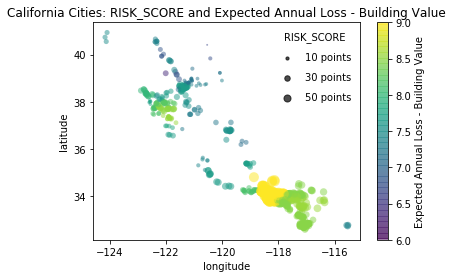

In [160]:
# Extract the data we're interested in
lat, lon = dfa['Latitude'], dfa['Longitude']
Loss_Building, risk = dfa['EAL_VALB'], dfa['RISK_SCORE']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,c=np.log10(Loss_Building), cmap='viridis',s=risk, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='Expected Annual Loss - Building Value')
plt.clim(6, 9)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for risk in [10, 30, 50]:
    plt.scatter([], [], c='k', alpha=0.7, s=risk,label=str(risk) + ' points')
    plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='RISK_SCORE')
    plt.title('California Cities: RISK_SCORE and Expected Annual Loss - Building Value');

* The circle is bigger, the risk score is higher. The color of circle means the loss in building value, as you can see the companies in south of californiia have higher loss iin building value as they have higher risk score.

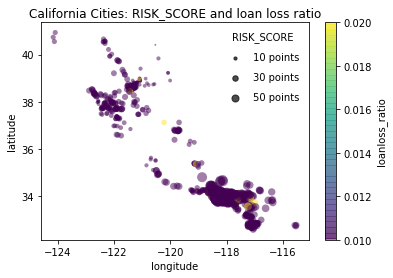

In [161]:
# Extract the data we're interested in
lat, lon = dfa['Latitude'], dfa['Longitude']
loan, risk = dfa['loanloss_ratio'], dfa['RISK_SCORE']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,c=loan, cmap='viridis',s=risk, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='loanloss_ratio')
plt.clim(0.01, 0.02)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for risk in [10, 30, 50]:
    plt.scatter([], [], c='k', alpha=0.7, s=risk,label=str(risk) + ' points')
    plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='RISK_SCORE')
    plt.title('California Cities: RISK_SCORE and loan loss ratio');

* The circle is bigger, the risk score is higher. The color of circle means loan loss ratio, as you can see the companies in south of california have higher loan loss ratio (yellow) as they have higher risk score (big yellow circle). But this relationship is not normal, because the big purple circle also exist in the south of california.

# Normalization & Prepare for modeling

## Prepare the data for Normalization and Modelling

choose columns we need for modeling

In [4]:
newclimate_loan_4model =climate_loan [[
                         'GrossApproval',
                         'GrossChargeOffAmount',
                         'InitialInterestRate',
                         'loanloss_ratio',
                         'RISK_SCORE',
                         'RISK_NPCTL',
                         'RISK_SPCTL',
                         'EAL_SCORE',
                         'EAL_VALT',
                         'EAL_VALB',
                         'EAL_VALP',
                         'EAL_VALA',
                         'SOVI_SCORE',
                         'RESL_SCORE',
 'CFLD_EVNTS',
 'CFLD_AFREQ',
 'CFLD_EXPB',
 'CFLD_EXPP',
 'CFLD_EXPT',
 'CFLD_EALB',
 'CFLD_EALP',
 'CFLD_EALT',
 'CFLD_EALS',
 'CFLD_RISKS',
  'RFLD_EVNTS',
 'RFLD_AFREQ',
 'RFLD_EXPB',
 'RFLD_EXPP',
 'RFLD_EXPA',
 'RFLD_EXPT',
 'RFLD_EALB',
 'RFLD_EALP',
 'RFLD_EALT',
 'RFLD_EALA',
 'RFLD_EALS',
 'RFLD_RISKS',
 'DRGT_EVNTS',
 'DRGT_AFREQ',
 'DRGT_EXPA',
 'DRGT_EXPT',
 'DRGT_EALA',
 'DRGT_EALT',
 'DRGT_EALS',
 'DRGT_RISKS',
 'ERQK_EVNTS',
 'ERQK_AFREQ',
 'ERQK_EXPB',
 'ERQK_EXPP',
 'ERQK_EXPT',
 'ERQK_EALB',
 'ERQK_EALP',
 'ERQK_EALT',
 'ERQK_EALS',
 'ERQK_RISKS',
 'HAIL_EVNTS',
 'HAIL_AFREQ',
 'HAIL_EXPB',
 'HAIL_EXPP',
 'HAIL_EXPA',
 'HAIL_EXPT',
 'HAIL_EALB',
 'HAIL_EALP',
 'HAIL_EALA',
 'HAIL_EALT',
 'HAIL_EALS',
 'HAIL_RISKS',
 'HRCN_EVNTS',
 'HRCN_AFREQ',
 'HRCN_EXPB',
 'HRCN_EXPP',
 'HRCN_EXPA',
 'HRCN_EXPT',
 'HRCN_EALB',
 'HRCN_EALP',
 'HRCN_EALA',
 'HRCN_EALT',
 'HRCN_EALS',
 'HRCN_RISKS',
 'ISTM_EVNTS',
 'ISTM_AFREQ',
 'ISTM_EXPB',
 'ISTM_EXPP',
 'ISTM_EXPT',
 'ISTM_EALB',
 'ISTM_EALP',
 'ISTM_EALT',
 'ISTM_EALS',
 'ISTM_RISKS', 
 'LNDS_EVNTS',
 'LNDS_AFREQ',
 'LNDS_EXPB',
 'LNDS_EXPP',
 'LNDS_EXPT',
 'LNDS_EALB',
 'LNDS_EALP',
 'LNDS_EALT',
 'LNDS_EALS',
 'LNDS_RISKS',
 'TRND_EVNTS',
 'TRND_AFREQ',
 'TRND_EXPB',
 'TRND_EXPP',
 'TRND_EXPA',
 'TRND_EXPT',
 'TRND_EALB',
 'TRND_EALP',
 'TRND_EALA',
 'TRND_EALT',
 'TRND_EALS',
 'TRND_RISKS',
 'WFIR_EVNTS',
 'WFIR_AFREQ',
 'WFIR_EXPB',
 'WFIR_EXPP',
 'WFIR_EXPA',
 'WFIR_EXPT',
 'WFIR_EALB',
 'WFIR_EALP',
 'WFIR_EALA',
 'WFIR_EALT',
 'WFIR_EALS',
 'WFIR_RISKS']]
newclimate_loan_4model.head()

,GrossApproval,GrossChargeOffAmount,InitialInterestRate,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,345000,0,6.779325,0.0,40.501966,99.299809,100.000000,36.261679,7.515884e+07,4.781115e+07,...,3.652173e+09,32080.223971,4.328419e+06,2.474662e+11,4.890872e+06,0.000877,1.509773,4.897542e+06,31.386367,40.744914
1,200000,0,9.414968,0.0,27.678576,97.135582,77.611940,32.023062,5.277442e+07,3.047642e+07,...,5.821840e+09,50282.938745,1.120689e+08,3.880842e+11,1.008792e+07,0.005435,21153.924104,1.015038e+07,40.016811,40.201854
2,140000,0,7.951580,0.0,9.265243,50.732018,71.212121,14.140853,5.559304e+06,2.283991e+06,...,2.207758e+08,1842.399912,2.351425e+07,1.424653e+10,3.741213e+04,0.000054,117.340908,3.794203e+04,6.210432,4.730883
3,120000,0,7.227568,0.0,8.279500,40.865691,70.000000,17.766980,1.025914e+07,5.990996e+06,...,3.396597e+09,27826.114842,3.062790e+06,2.148781e+11,2.366443e+05,0.002965,8.810669,2.591833e+05,11.783763,6.384612
4,100000,0,8.093371,0.0,11.832827,71.164863,78.947368,18.926910,1.218738e+07,6.560555e+06,...,4.140452e+06,50.406735,5.495914e+04,3.872866e+08,2.912168e+02,0.000005,0.146718,3.311537e+02,1.278669,0.929326


In [5]:
newclimate_loan_4model=newclimate_loan_4model.drop_duplicates().fillna(0)
newclimate_loan_4model.isnull().sum().sort_values(ascending=False)

WFIR_RISKS       0
RFLD_EALB        0
RFLD_EALT        0
RFLD_EALA        0
RFLD_EALS        0
                ..
ISTM_EALT        0
ISTM_EALS        0
ISTM_RISKS       0
LNDS_EVNTS       0
GrossApproval    0
Length: 122, dtype: int64

In [12]:
newclimate_loan_4model.sort_values(by='InitialInterestRate', ascending=False)

,GrossApproval,GrossChargeOffAmount,InitialInterestRate,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
1012351,600000,0,56.00,0.0,12.994737,76.543603,42.857143,32.392424,5.451906e+07,4.762104e+07,...,1.282068e+09,9417.687343,2.438372e+06,7.285893e+10,2.665719e+05,1.463787e-04,24.785264,2.677092e+05,11.911581,5.554979
1013043,395000,0,30.75,0.0,7.676800,34.404838,46.590909,12.173871,3.751061e+06,2.963527e+06,...,2.023724e+07,213.224438,1.153233e+05,1.640858e+09,6.570097e+01,1.066360e-06,0.013210,7.381852e+01,0.775301,0.568456
1546825,25000,0,13.50,0.0,30.256430,97.740293,80.000000,35.771863,7.229901e+07,6.111714e+07,...,1.526692e+10,118538.650068,1.828242e+08,9.163435e+11,1.228331e+07,2.855123e-04,13.326626,1.228549e+07,42.646081,41.924991
1548459,25000,0,13.50,0.0,11.818548,71.037556,71.641791,13.815484,5.227071e+06,2.423722e+06,...,1.346974e+07,159.452795,2.025079e+05,1.225513e+09,2.681376e+03,4.440806e-05,1.455860,3.020333e+03,2.671570,2.656844
1567613,10000,0,13.25,0.0,28.048087,97.231063,98.507463,37.061109,7.998669e+07,6.569661e+07,...,3.598688e+07,341.823958,1.740980e+04,2.633866e+09,6.983336e+03,1.089191e-04,0.158065,7.811280e+03,3.667097,3.225739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558714,10000,0,0.00,0.0,55.474121,99.872693,100.000000,25.570293,2.800214e+07,1.392733e+07,...,5.605318e+05,0.731024,0.000000e+00,6.116315e+06,7.198953e+00,7.219910e-10,0.000000,7.204440e+00,0.356956,0.900043
1513719,40000,0,0.00,0.0,23.541170,95.289624,92.125984,38.878323,9.172075e+07,4.442335e+07,...,4.389111e+09,36320.772942,4.121466e+06,2.804311e+11,1.303945e+06,1.179380e-02,5.377699,1.393584e+06,20.643944,14.529351
1417820,50000,0,0.00,0.0,37.986089,99.077021,98.031496,23.544807,2.224630e+07,1.603755e+07,...,5.407802e+08,14059.152352,2.171932e+07,1.074121e+11,1.588399e+05,2.358755e-04,79.652317,1.607122e+05,10.048424,18.842312
1012997,267000,0,0.00,0.0,40.393356,99.267982,89.655172,64.784329,4.015266e+08,3.146831e+08,...,1.961454e+09,13493.758126,1.216700e+07,1.045262e+11,3.701538e+06,1.359385e-02,0.086521,3.804851e+06,28.853215,20.909249


In [6]:
newclimate_loan_4model['loanloss_ratio'].describe()

count    1.421233e+06
mean     1.038886e-01
std      2.714721e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.979200e+00
Name: loanloss_ratio, dtype: float64

In [7]:
newclimate_loan_4model['InitialInterestRate'].describe()

count    1.421233e+06
mean     6.678684e+00
std      1.636308e+00
min      0.000000e+00
25%      5.450000e+00
50%      6.750000e+00
75%      8.072770e+00
max      5.600000e+01
Name: InitialInterestRate, dtype: float64

### Check outliers 

<AxesSubplot:xlabel='InitialInterestRate', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

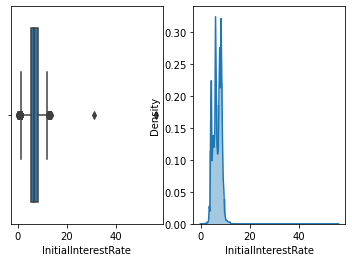

In [126]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(newclimate_loan_4model.InitialInterestRate, ax=ax[0])
sns.distplot(newclimate_loan_4model.InitialInterestRate, ax=ax[1])

<AxesSubplot:xlabel='loanloss_ratio', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

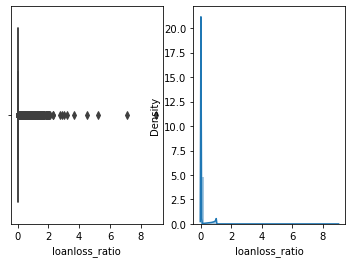

In [127]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(newclimate_loan_4model.loanloss_ratio, ax=ax[0])
sns.distplot(newclimate_loan_4model.loanloss_ratio, ax=ax[1])

<AxesSubplot:xlabel='GrossApproval', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

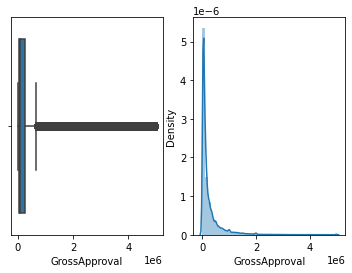

In [128]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(newclimate_loan_4model.GrossApproval, ax=ax[0])
sns.distplot(newclimate_loan_4model.GrossApproval, ax=ax[1])

<AxesSubplot:xlabel='GrossChargeOffAmount', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

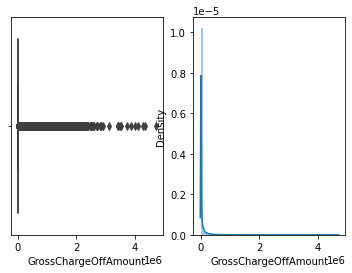

In [129]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(newclimate_loan_4model.GrossChargeOffAmount, ax=ax[0])
sns.distplot(newclimate_loan_4model.GrossChargeOffAmount, ax=ax[1])

<AxesSubplot:xlabel='RISK_SCORE', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

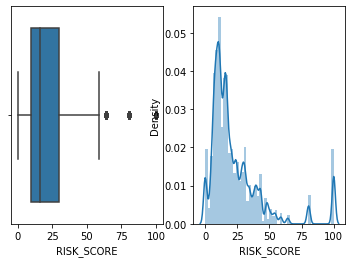

In [130]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(newclimate_loan_4model.RISK_SCORE, ax=ax[0])
sns.distplot(newclimate_loan_4model.RISK_SCORE, ax=ax[1])

<AxesSubplot:xlabel='EAL_VALT', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

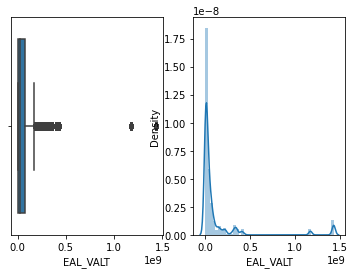

In [131]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(newclimate_loan_4model.EAL_VALT, ax=ax[0])
sns.distplot(newclimate_loan_4model.EAL_VALT, ax=ax[1])

Check the amount and percent of outliers

In [132]:
mean = np.mean(newclimate_loan_4model['EAL_VALT'])
std = np.std(newclimate_loan_4model['EAL_VALT'])
threshold = 3
outlier = []
for i in newclimate_loan_4model['EAL_VALT']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', len(outlier))
print('The percent of outlier in dataset is',len(outlier)/len(newclimate_loan_4model['EAL_VALT']))#The percentage of outliers in the  is %

outlier in dataset is 76661
The percent of outlier in dataset is 0.0539397832726935


In [ ]:
####### Check the outlier and its percent for these important variables 
# #### Outlier percent for variables:
# RISK_SCORE = 3.9%
# InitialInterestRate = 0.1322%
# Loanloss_ratio = 4.37%
# GrossApproval = 2.17684%
# GrossChargeOffAmount = 1.4675%
# EAL_VALT (Total Expected annual loss)= 5.393978%

### Dealing with outlier

Detecting the outliers using IQR and removing them

In [8]:
mean_i = np.mean(newclimate_loan_4model['InitialInterestRate'])
std_i = np.std(newclimate_loan_4model['InitialInterestRate'])
upper_arr1 = mean_i + 3*std_i
lower_arr1 = mean_i - 3*std_i
df_4model=  newclimate_loan_4model[(newclimate_loan_4model.InitialInterestRate<upper_arr1) & 
                       (newclimate_loan_4model.InitialInterestRate>lower_arr1)]

In [9]:
mean_l = np.mean(newclimate_loan_4model['loanloss_ratio'])
std_l = np.std(newclimate_loan_4model['loanloss_ratio'])
upper_arr2 = mean_l + 3*std_l
lower_arr2 = mean_l - 3*std_l
df_model=  df_4model[(df_4model.loanloss_ratio<upper_arr2) & 
                       (df_4model.loanloss_ratio>lower_arr2)]

<Figure size 432x288 with 0 Axes>

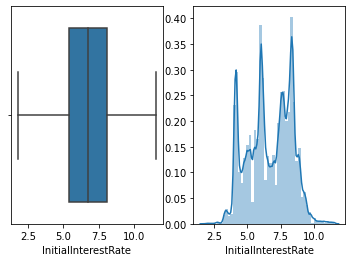

In [10]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(df_model.InitialInterestRate, ax=ax[0])
sns.distplot(df_model.InitialInterestRate, ax=ax[1])

<AxesSubplot:xlabel='loanloss_ratio', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

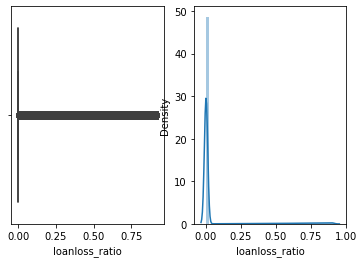

In [136]:
fig = plt.figure()
fig, ax=plt.subplots(1,2)
sns.boxplot(df_model.loanloss_ratio, ax=ax[0])
sns.distplot(df_model.loanloss_ratio, ax=ax[1])

In [137]:
df_model.sort_values(by='InitialInterestRate', ascending=False)

,GrossApproval,GrossChargeOffAmount,InitialInterestRate,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
1571748,25300,0,11.545,0.0,47.923065,99.618078,100.000000,52.726760,2.206471e+08,1.210158e+08,...,1.065434e+08,683.910378,1.010741e+06,5.305273e+09,9.977218e+02,0.000010,0.823139,1.071586e+03,1.891287,1.997877
1562221,10000,0,11.540,0.0,24.139661,95.544239,68.656716,19.608156,1.342516e+07,7.710109e+06,...,3.184305e+09,21154.146210,1.081431e+07,1.639666e+11,3.749504e+06,0.000378,1100.960483,3.753481e+06,28.722775,41.100974
1571086,35400,0,11.535,0.0,35.116118,98.631445,100.000000,36.067981,7.401908e+07,4.758555e+07,...,1.553456e+07,146.302027,1.044221e+05,1.127534e+09,1.700390e+02,0.000002,0.038721,1.886588e+02,1.060004,1.199506
1570202,15200,0,11.535,0.0,18.884510,92.266073,71.428571,19.113611,1.251869e+07,4.792355e+06,...,2.939598e+07,249.237192,8.717627e+03,1.923607e+09,2.905262e+03,0.000005,0.041218,2.944421e+03,2.648998,3.042248
1150914,24000,0,11.520,0.0,21.659410,94.525780,94.000000,26.175345,2.989612e+07,1.403947e+07,...,1.297718e+07,208.710137,1.204304e+06,1.600379e+09,6.223320e+02,0.000058,1.468081,1.061025e+03,1.885053,1.813079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274053,20000,0,1.776,0.0,11.183642,66.359007,71.428571,18.816799,1.199476e+07,5.549098e+06,...,1.519343e+09,12629.576955,2.975980e+06,9.750710e+10,5.871029e+04,0.000728,4.741791,6.424410e+04,7.402176,5.114534
1362160,44000,0,1.776,0.0,11.183642,66.359007,71.428571,18.816799,1.199476e+07,5.549098e+06,...,1.519343e+09,12629.576955,2.975980e+06,9.750710e+10,5.871029e+04,0.000728,4.741791,6.424410e+04,7.402176,5.114534
1352944,90000,0,1.776,0.0,11.183642,66.359007,71.428571,18.816799,1.199476e+07,5.549098e+06,...,1.519343e+09,12629.576955,2.975980e+06,9.750710e+10,5.871029e+04,0.000728,4.741791,6.424410e+04,7.402176,5.114534
1416462,250000,0,1.773,0.0,12.787548,75.684278,61.811024,14.638287,6.093980e+06,3.338092e+06,...,5.222701e+07,441.036586,8.267112e+05,3.404932e+09,1.239470e+04,0.000118,0.902662,1.329235e+04,4.378065,4.446008


In [7]:
df_model.head()

,GrossApproval,GrossChargeOffAmount,InitialInterestRate,loanloss_ratio,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,345000,0,6.779325,0.0,40.501966,99.299809,100.000000,36.261679,7.515884e+07,4.781115e+07,...,3.652173e+09,32080.223971,4.328419e+06,2.474662e+11,4.890872e+06,0.000877,1.509773,4.897542e+06,31.386367,40.744914
1,200000,0,9.414968,0.0,27.678576,97.135582,77.611940,32.023062,5.277442e+07,3.047642e+07,...,5.821840e+09,50282.938745,1.120689e+08,3.880842e+11,1.008792e+07,0.005435,21153.924104,1.015038e+07,40.016811,40.201854
2,140000,0,7.951580,0.0,9.265243,50.732018,71.212121,14.140853,5.559304e+06,2.283991e+06,...,2.207758e+08,1842.399912,2.351425e+07,1.424653e+10,3.741213e+04,0.000054,117.340908,3.794203e+04,6.210432,4.730883
3,120000,0,7.227568,0.0,8.279500,40.865691,70.000000,17.766980,1.025914e+07,5.990996e+06,...,3.396597e+09,27826.114842,3.062790e+06,2.148781e+11,2.366443e+05,0.002965,8.810669,2.591833e+05,11.783763,6.384612
4,100000,0,8.093371,0.0,11.832827,71.164863,78.947368,18.926910,1.218738e+07,6.560555e+06,...,4.140452e+06,50.406735,5.495914e+04,3.872866e+08,2.912168e+02,0.000005,0.146718,3.311537e+02,1.278669,0.929326


In [20]:
# Output the df_model data 
df_model.to_csv("df_model.csv",index=False)

## Normalization

Normalize all independent variables

In [4]:
cols=['loanloss_ratio','InitialInterestRate']
X_features = df_model.drop(cols, inplace=False, axis=1)
print(X_features.columns.tolist())

['GrossApproval', 'GrossChargeOffAmount', 'RISK_SCORE', 'RISK_NPCTL', 'RISK_SPCTL', 'EAL_SCORE', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP', 'EAL_VALA', 'SOVI_SCORE', 'RESL_SCORE', 'CFLD_EVNTS', 'CFLD_AFREQ', 'CFLD_EXPB', 'CFLD_EXPP', 'CFLD_EXPT', 'CFLD_EALB', 'CFLD_EALP', 'CFLD_EALT', 'CFLD_EALS', 'CFLD_RISKS', 'RFLD_EVNTS', 'RFLD_AFREQ', 'RFLD_EXPB', 'RFLD_EXPP', 'RFLD_EXPA', 'RFLD_EXPT', 'RFLD_EALB', 'RFLD_EALP', 'RFLD_EALT', 'RFLD_EALA', 'RFLD_EALS', 'RFLD_RISKS', 'DRGT_EVNTS', 'DRGT_AFREQ', 'DRGT_EXPA', 'DRGT_EXPT', 'DRGT_EALA', 'DRGT_EALT', 'DRGT_EALS', 'DRGT_RISKS', 'ERQK_EVNTS', 'ERQK_AFREQ', 'ERQK_EXPB', 'ERQK_EXPP', 'ERQK_EXPT', 'ERQK_EALB', 'ERQK_EALP', 'ERQK_EALT', 'ERQK_EALS', 'ERQK_RISKS', 'HAIL_EVNTS', 'HAIL_AFREQ', 'HAIL_EXPB', 'HAIL_EXPP', 'HAIL_EXPA', 'HAIL_EXPT', 'HAIL_EALB', 'HAIL_EALP', 'HAIL_EALA', 'HAIL_EALT', 'HAIL_EALS', 'HAIL_RISKS', 'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPB', 'HRCN_EXPP', 'HRCN_EXPA', 'HRCN_EXPT', 'HRCN_EALB', 'HRCN_EALP', 'HRCN_EALA', 'HRCN_EALT', 'HRC

In [5]:
X_features.head()

,GrossApproval,GrossChargeOffAmount,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,EAL_VALP,EAL_VALA,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,345000,0,40.501966,99.299809,100.000000,36.261679,7.515884e+07,4.781115e+07,3.581071,1.315531e+05,...,3.652173e+09,32080.223971,4.328419e+06,2.474662e+11,4.890872e+06,0.000877,1.509773,4.897542e+06,31.386367,40.744914
1,200000,0,27.678576,97.135582,77.611940,32.023062,5.277442e+07,3.047642e+07,2.506882,3.245695e+06,...,5.821840e+09,50282.938745,1.120689e+08,3.880842e+11,1.008792e+07,0.005435,21153.924104,1.015038e+07,40.016811,40.201854
2,140000,0,9.265243,50.732018,71.212121,14.140853,5.559304e+06,2.283991e+06,0.301146,9.866069e+05,...,2.207758e+08,1842.399912,2.351425e+07,1.424653e+10,3.741213e+04,0.000054,117.340908,3.794203e+04,6.210432,4.730883
3,120000,0,8.279500,40.865691,70.000000,17.766980,1.025914e+07,5.990996e+06,0.490491,5.404123e+05,...,3.396597e+09,27826.114842,3.062790e+06,2.148781e+11,2.366443e+05,0.002965,8.810669,2.591833e+05,11.783763,6.384612
4,100000,0,11.832827,71.164863,78.947368,18.926910,1.218738e+07,6.560555e+06,0.700354,3.041408e+05,...,4.140452e+06,50.406735,5.495914e+04,3.872866e+08,2.912168e+02,0.000005,0.146718,3.311537e+02,1.278669,0.929326


In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = X_features.columns
d = scaler.fit_transform(X_features)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,GrossApproval,GrossChargeOffAmount,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,EAL_VALP,EAL_VALA,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
0,0.068986,0.0,0.405020,0.992998,1.000000,0.362617,0.052428,0.040922,0.102702,0.000537,...,0.181785,0.191866,0.004389,0.191616,0.030955,0.004273,0.000031,0.030919,0.313864,0.407449
1,0.039986,0.0,0.276786,0.971356,0.776119,0.320231,0.036813,0.026085,0.071895,0.013247,...,0.289779,0.300733,0.113632,0.300499,0.063848,0.026472,0.435121,0.064081,0.400168,0.402019
2,0.027985,0.0,0.092652,0.507320,0.712121,0.141409,0.003878,0.001955,0.008637,0.004027,...,0.010989,0.011019,0.023842,0.011031,0.000237,0.000264,0.002414,0.000240,0.062104,0.047309
3,0.023985,0.0,0.082795,0.408657,0.700000,0.177670,0.007156,0.005128,0.014067,0.002206,...,0.169064,0.166423,0.003106,0.166383,0.001498,0.014438,0.000181,0.001636,0.117838,0.063846
4,0.019985,0.0,0.118328,0.711649,0.789474,0.189269,0.008501,0.005615,0.020085,0.001241,...,0.000206,0.000301,0.000056,0.000300,0.000002,0.000025,0.000003,0.000002,0.012787,0.009293


######## Another method for Normalization
from sklearn import preprocessing
import pandas as pd
names2=X_features.columns
d2 = preprocessing.normalize(X_features)
scaled_df2 = pd.DataFrame(d2, columns=names)
scaled_df2.head()

In [14]:
scaled_df.describe()

,GrossApproval,GrossChargeOffAmount,RISK_SCORE,RISK_NPCTL,RISK_SPCTL,EAL_SCORE,EAL_VALT,EAL_VALB,EAL_VALP,EAL_VALA,...,WFIR_EXPB,WFIR_EXPP,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_RISKS
count,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,...,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06,1.357892e+06
mean,5.495330e-02,2.735975e-03,2.292456e-01,7.341231e-01,7.291966e-01,2.979223e-01,8.782969e-02,8.360546e-02,9.765762e-02,9.588845e-03,...,1.086418e-01,1.063281e-01,3.508364e-02,1.063376e-01,4.511207e-02,1.788662e-02,2.238806e-02,4.518130e-02,1.503686e-01,1.390921e-01
std,9.724160e-02,1.639768e-02,2.110023e-01,3.006142e-01,2.909307e-01,2.157696e-01,2.121811e-01,2.165197e-01,2.023190e-01,4.950499e-02,...,2.253392e-01,2.185195e-01,1.060855e-01,2.185415e-01,1.527219e-01,5.392168e-02,1.200209e-01,1.526749e-01,2.138754e-01,2.228007e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.985120e-03,0.000000e+00,9.888984e-02,5.633355e-01,5.714286e-01,1.568958e-01,5.116280e-03,3.184572e-03,9.548554e-03,2.230206e-04,...,2.410513e-03,2.318025e-03,1.609797e-04,2.309497e-03,1.028033e-05,2.397868e-05,1.801199e-06,1.129072e-05,2.243403e-02,1.614800e-02
50%,1.998530e-02,0.000000e+00,1.613392e-01,8.720560e-01,8.275862e-01,2.467137e-01,1.767526e-02,1.121434e-02,3.118602e-02,9.644965e-04,...,1.269348e-02,1.306477e-02,2.521619e-03,1.304648e-02,1.510772e-04,5.286123e-04,3.045632e-05,1.552147e-04,5.374164e-02,3.862431e-02
75%,5.998590e-02,0.000000e+00,2.929380e-01,9.758116e-01,9.677419e-01,3.577186e-01,5.043300e-02,4.072869e-02,7.961803e-02,3.310790e-03,...,8.536796e-02,8.782972e-02,1.372464e-02,8.732107e-02,6.634678e-03,5.542109e-03,9.362855e-04,6.750527e-03,1.889931e-01,1.586157e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
x_features=scaled_df.copy()

array([[<AxesSubplot:title={'center':'RISK_SCORE'}>]], dtype=object)

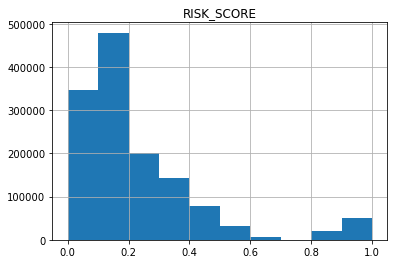

In [143]:
x_features.hist(column='RISK_SCORE')

<AxesSubplot:xlabel='RISK_SCORE', ylabel='InitialInterestRate'>

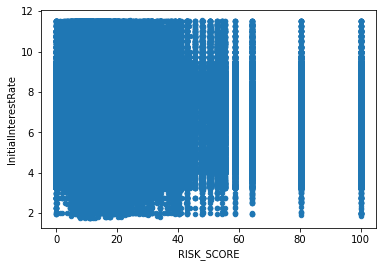

In [144]:
df_model.plot.scatter(x='RISK_SCORE', y='InitialInterestRate')

### Y = Loan loss ratio

In [8]:
Y_L= df_model[['loanloss_ratio']]

In [146]:
Y_L.sort_values(by='loanloss_ratio',ascending=False)

,loanloss_ratio
1416945,0.9183
1169558,0.9183
1108987,0.9183
837329,0.9183
293908,0.9183
...,...
478421,0.0000
478420,0.0000
478419,0.0000
478418,0.0000


Text(0.5, 1.0, 'Normalized data')

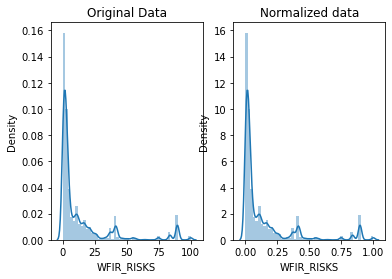

In [147]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_model['WFIR_RISKS'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_features['WFIR_RISKS'], ax=ax[1])
ax[1].set_title("Normalized data")

<AxesSubplot:xlabel='RISK_SCORE', ylabel='loanloss_ratio'>

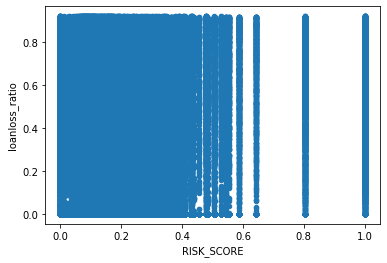

In [148]:
#bivariate analysis Normalized data
df_L=pd.concat([x_features, Y_L], axis=1)
df_L.plot.scatter(x='RISK_SCORE', y='loanloss_ratio')

Text(0.5, 1.0, 'Normalized data')

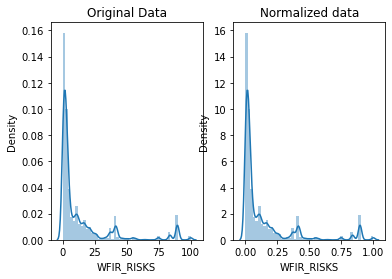

In [152]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_model['WFIR_RISKS'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_features['WFIR_RISKS'], ax=ax[1])
ax[1].set_title("Normalized data")

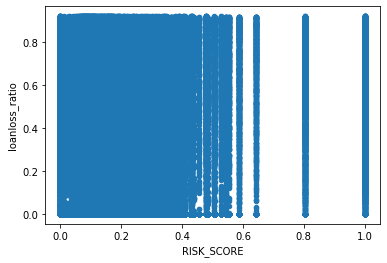

In [153]:
#bivariate analysis Normalized data
df=pd.concat([x_features, Y_L],axis=1)
df.plot.scatter(x='RISK_SCORE', y='loanloss_ratio');

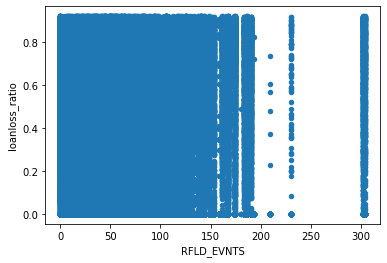

In [154]:
df_model.plot.scatter(x='RFLD_EVNTS', y='loanloss_ratio');

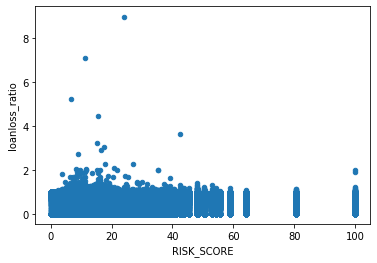

In [173]:
df_model.plot.scatter(x='RISK_SCORE', y='loanloss_ratio')

### Y = Initial Interest Rate

In [9]:
Y_I= df_model ['InitialInterestRate']

Text(0.5, 1.0, 'Normalized data')

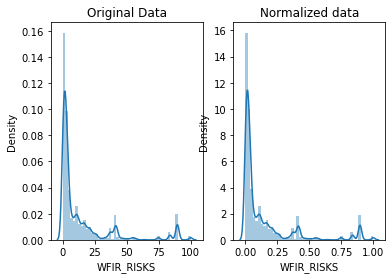

In [156]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(newclimate_loan_4model['WFIR_RISKS'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_features['WFIR_RISKS'], ax=ax[1])
ax[1].set_title("Normalized data")

<AxesSubplot:xlabel='RISK_SCORE', ylabel='GrossChargeOffAmount'>

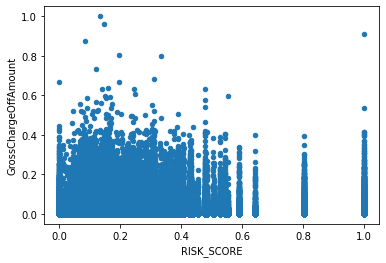

In [157]:
#bivariate analysis Normalized data
df_I=pd.concat([x_features, Y_I],axis=1)
df_I.plot.scatter(x='RISK_SCORE', y='GrossChargeOffAmount')

## Explore the correlation between independent variables and dependent variables

In [9]:
y_nameI = 'InitialInterestRate'
y_nameL = 'loanloss_ratio'

In [163]:
x_names= [name for name in df_model.columns if name not in [y_nameL, y_nameI]]

In [166]:
# correlation between all independent variables and Initial Interest Rate
corr1 = pd.DataFrame(df_model[x_names + [y_nameI]].corr()[y_nameI]).iloc[:-1]
corr1.columns = ['Pearson Correlation Coefficient']
corr1.sort_values(by='Pearson Correlation Coefficient', ascending=False).head(20)

,Pearson Correlation Coefficient
DRGT_RISKS,0.017505
ISTM_EALP,0.016083
RFLD_RISKS,0.015303
TRND_EALT,0.013108
CFLD_RISKS,0.013099
TRND_RISKS,0.012869
SOVI_SCORE,0.012861
TRND_EALP,0.012573
HRCN_EXPP,0.012448
HRCN_EXPT,0.012442


In [174]:
corr2 = pd.DataFrame(df_model[x_names + [y_nameL]].corr()[y_nameL]).iloc[:-1]
corr2.columns = ['Pearson Correlation Coefficient']
corr2.sort_values(by='Pearson Correlation Coefficient', ascending=False).head(20)

,Pearson Correlation Coefficient
GrossChargeOffAmount,0.488601
TRND_RISKS,0.042794
RISK_SCORE,0.037665
TRND_EALS,0.035065
RFLD_RISKS,0.033456
TRND_EXPB,0.033265
ERQK_EXPB,0.033265
HAIL_EXPB,0.033264
ERQK_EXPT,0.032212
TRND_EXPT,0.032212


<AxesSubplot:>

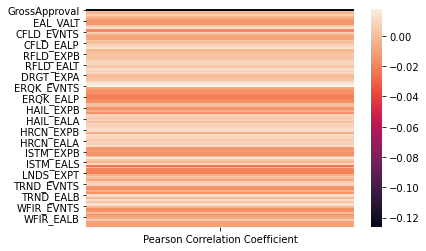

In [173]:
sns.heatmap(corr1)

<AxesSubplot:>

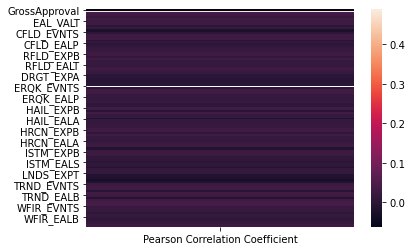

In [175]:
sns.heatmap(corr2)

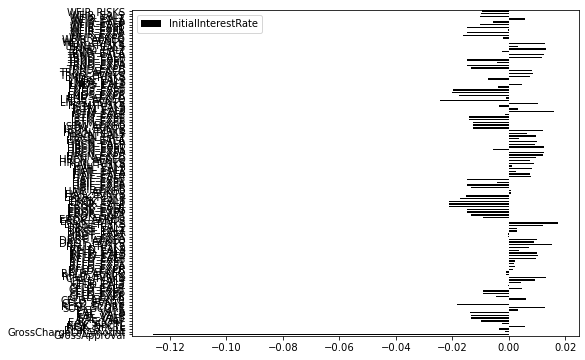

In [170]:
fig,ax=plt.subplots(figsize=(8,6))
_=pd.DataFrame(df_model[x_names + [y_nameI]].corr()[y_nameI]).iloc[:-1].plot(kind='barh',ax=ax,colormap='gnuplot')

The above plot shows the correlations between all independent variables and initialinterestrate in the range of -0.02 to 0.02,which means very weak relationship. 

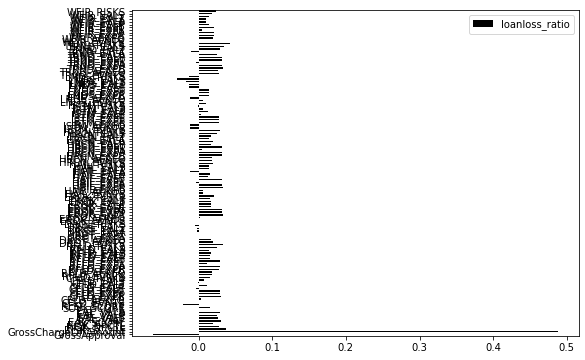

In [55]:
fig,ax=plt.subplots(figsize=(8,6))
_=pd.DataFrame(df_model[x_names + [y_nameL]].corr()[y_nameL]).iloc[:-1].plot(kind='barh',ax=ax,colormap='gnuplot')

The above plot shows the correlations between all independent variables and loanloss_ratio in the range of -0.02 to 0.1, which means very weak relationship.

# Modelling

### Split the dataset into training and testing

In [10]:
from sklearn.model_selection import train_test_split
### Y= Loanloss_ratio
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_features, Y_L, test_size=0.3, random_state=100)
### Y= Initial Interest Rate
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_features, Y_I, test_size=0.3, random_state=100)

In [11]:
len(X_train1)

950524

In [12]:
len(Y_test1)

407368

## Ridge Regression

### Y=Loan loss ratio

In [176]:
#scikit-learn provide an cross-validation API to select the optimum α that we used it to select the best option for α among listed 10 values

from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 7, 10, 30,100, 200])
ridgecv.fit(X_train1, Y_train1)
ridgecv.alpha_  # 0.01 

0.01

In [177]:
#Ridge Regression
from sklearn.linear_model import Ridge

# The larger of alpha，the larger the punishment
rr = Ridge(alpha=0.01) 
rr.fit(X_train1,Y_train1)

Ridge(alpha=0.01)

In [178]:
#Return the coefficient of determination of the prediction R^2
Ridge_train_score1 = rr.score(X_train1,Y_train1)
Ridge_test_score1 = rr.score(X_test1, Y_test1)
print ("ridge regression train score low alpha:", Ridge_train_score1)
print ("ridge regression test score low alpha:", Ridge_test_score1)

ridge regression train score low alpha: 0.25823300696482465
ridge regression test score low alpha: 0.26323338762204007


In [179]:
print(rr.coef_)

[[-2.84537978e-01  6.19871362e+00 -3.15213053e-02  8.13004540e-03
  -8.53557088e-03  7.47759619e-03  4.35857151e-02  2.17160337e-01
   4.74104647e-02 -8.31806272e-01  3.89983112e-02 -5.39005661e-02
   0.00000000e+00 -2.47947303e-03 -6.05099103e-03  1.03590205e-03
   9.35877613e-04 -2.45753864e-02  4.21262440e-04 -2.43681127e-02
   3.30092459e-02 -3.74268710e-02 -1.29300978e-01  1.16663606e-01
  -5.70251491e-02  2.81497112e-02  1.39856398e-02  2.68089391e-02
  -4.48327191e-02 -1.77820200e-04 -3.88496952e-02  9.96641453e-02
  -1.51675951e-02  4.60930399e-02  4.49970230e-02 -4.17829431e-02
   3.06765316e-03  3.06765320e-03  4.12037199e-01  4.12037199e-01
   2.31238811e-02 -1.88125533e-02  0.00000000e+00 -1.65614377e-04
  -1.55191902e-01  4.04317044e-02  3.79700485e-02 -1.82608423e-01
   3.29076025e-03 -1.46877253e-01  3.00627258e-02  3.99928411e-02
  -1.06888111e+00  1.08909309e+00  1.26192399e-01  4.05649649e-02
   8.53700454e-03  4.16427184e-02 -5.93609262e-03 -9.89033293e-03
  -8.24442

In [180]:
Y_hat = rr.predict(X_test1)  #Prediction of test dataset

In [181]:
from sklearn import metrics  #import metrics 
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test1, Y_hat)))  #calculate RMSE

RMSE: 0.1736989481331187


### Y: Initial Interest Rate

In [182]:
# same method as before
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 7, 10, 30,100, 200])
ridgecv.fit(X_train2, Y_train2)
ridgecv.alpha_  # 0.01 

0.01

In [183]:
#Ridge Regression
from sklearn.linear_model import Ridge
rr2 = Ridge(alpha=0.01) 
rr2.fit(X_train2, Y_train2)

Ridge(alpha=0.01)

In [184]:
#Return the coefficient of determination of the prediction R^2
Ridge_train_score2 = rr2.score(X_train2,Y_train2)
Ridge_test_score2 = rr2.score(X_test2, Y_test2)
print ("ridge regression train score low alpha:", Ridge_train_score2)
print ("ridge regression test score low alpha:", Ridge_test_score2)

ridge regression train score low alpha: 0.021133001430200693
ridge regression test score low alpha: 0.019813106256809765


In [185]:
Y_hat2 = rr.predict(X_test2)  #Prediction of test dataset

In [186]:
from sklearn import metrics  #Import metrics
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test2, Y_hat2)))  #Calculate RMSE

RMSE: 6.799806287623688


## ElasticNet Regression

### Y=Loan loss ratio

In [187]:
from sklearn import linear_model
elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)  # set the value of lambda and l1_ratio
elastic.fit(X_train1,Y_train1)  # Use train dataset to calculate the parameters
Y_hat3 = elastic.predict(X_test1)  # predict the test dataset
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test1, Y_hat3)))  #Calculate RMSE

RMSE: 0.2023635176570059


In [188]:
elastic_test_score = elastic.score(X_test1, Y_test1)
print ("ElasticNet Regression test score:", elastic_test_score)

ElasticNet Regression test score: -2.908047136429559e-10


### Y=Initial Interest Rate

In [189]:
from sklearn import linear_model
elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5) # set the value of lambda and l1_ratio
elastic.fit(X_train2,Y_train2)   # Use train dataset to calculate the parameters
Y_hat4 = elastic.predict(X_test2)  # predict the test dataset
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test2, Y_hat4)))  #Calculate RMSE

RMSE: 1.6321965209989029


In [190]:
elastic_test_score2 = elastic.score(X_test2, Y_test2)
print ("ElasticNet Regression test score:", elastic_test_score)

ElasticNet Regression test score: -2.908047136429559e-10


## Gradient Boosting Machine for Regression

### Y = Loan loss ratio

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
Gradientmodel = GradientBoostingRegressor()
Gradientmodel.fit(X_train1,Y_train1)
Y_hat5 = Gradientmodel.predict(X_test1)  #Prediction of test dataset
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test1, Y_hat5))) 
Gradientmodel_test_score1 = Gradientmodel.score(X_test1, Y_test1)
print ("Gradient Boosting Machine for Regression test score:", Gradientmodel_test_score1)

RMSE: 0.016724671189304777
Gradient Boosting Machine for Regression test score: 0.9931695276700787


### Y = Initial Interest Rate

In [16]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
Gradientmodel = GradientBoostingRegressor()
Gradientmodel.fit(X_train2,Y_train2)
Y_hat6 = Gradientmodel.predict(X_test2)  #Predict the test dataset
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test2, Y_hat6))) 
Gradientmodel_test_score2 = Gradientmodel.score(X_test2, Y_test2)
print ("Gradient Boosting Machine for Regression test score:", Gradientmodel_test_score2)

RMSE: 1.6009617645621554
Gradient Boosting Machine for Regression test score: 0.03790698228037437


## XG boost

In [ ]:
# Install the xgboost package
pip install xgboost

### Y=Loan loss ratio

In [21]:
from sklearn import metrics
from xgboost import XGBRegressor
xgb1 = XGBRegressor(n_estimators=500, learning_rate=0.05,min_child_weight=5, max_depth=4)
xgb1.fit(X_train1,Y_train1)
Y_hat7 = xgb1.predict(X_test1)  #Prediction of test dataset
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test1, Y_hat7))) 
xgb_test_score1 = xgbl.score(X_test1, Y_test1)
print ("XG boost for Regression test score:", xgb_test_score1)

RMSE: 0.005099645516962377
XG boost for Regression test score: 0.9993649388616935


### Y = Initial Interest Rate

In [23]:
from xgboost import XGBRegressor
xgb2 = XGBRegressor(n_estimators=500, learning_rate=0.05,min_child_weight=5, max_depth=4)
xgb2.fit(X_train2,Y_train2)
Y_hat8 = xgb2.predict(X_test2)  #Prediction of test dataset
print ("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test2, Y_hat8))) 
xgb_test_score2 = xgb2.score(X_test2, Y_test2)
print ("XG boost for Regression test score:", xgb_test_score2)

RMSE: 1.5929159037972107
XG boost for Regression test score: 0.04755295287431527


## Random Forest

### Y=Loan loss ratio

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
regressor1 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor1.fit(X_train1, Y_train1)
y_pred1 = regressor1.predict(X_test1)
RandomForest_test_score1 = regressor1.score(X_test1, Y_test1)

print ("RandomForest for Regression test score:", RandomForest_test_score1)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, y_pred1)))

RandomForest for Regression test score: 0.9999316523925105
Mean Absolute Error: 0.00022923610629700897
Mean Squared Error: 2.798902414091147e-06
Root Mean Squared Error: 0.001672992054401678


### Y=Initial Interest Rate

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(X_train2, Y_train2)
y_pred2 = regressor2.predict(X_test2)
RandomForest_test_score2 = regressor2.score(X_test2, Y_test2)

print ("RandomForest for Regression test score:", RandomForest_test_score2)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test2, y_pred2)))

RandomForest for Regression test score: -0.0894829831016366
Mean Absolute Error: 1.414090489381289
Mean Squared Error: 2.9024537510088204
Root Mean Squared Error: 1.7036589303639447
